In [422]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [423]:
df17 = pd.read_csv('FIFA17_official_data.csv')
df18 = pd.read_csv('FIFA18_official_data.csv')
df19 = pd.read_csv('FIFA19_official_data.csv')
df20 = pd.read_csv('FIFA20_official_data.csv')
df21 = pd.read_csv('FIFA21_official_data.csv')
df22 = pd.read_csv('FIFA22_official_data.csv')

In [424]:
all_columns = sorted(set.union(*[set(df.columns) for df in [df17, df18, df19, df20, df21, df22]]))
print("All possible columns:", all_columns)

All possible columns: ['Acceleration', 'Age', 'Aggression', 'Agility', 'Balance', 'BallControl', 'Best Overall Rating', 'Best Position', 'Body Type', 'Club', 'Club Logo', 'Composure', 'Contract Valid Until', 'Crossing', 'Curve', 'DefensiveAwareness', 'Dribbling', 'FKAccuracy', 'Finishing', 'Flag', 'GKDiving', 'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes', 'HeadingAccuracy', 'Height', 'ID', 'Interceptions', 'International Reputation', 'Jersey Number', 'Joined', 'Jumping', 'Loaned From', 'LongPassing', 'LongShots', 'Marking', 'Name', 'Nationality', 'Overall', 'Penalties', 'Photo', 'Position', 'Positioning', 'Potential', 'Preferred Foot', 'Reactions', 'Real Face', 'Release Clause', 'ShortPassing', 'ShotPower', 'Skill Moves', 'SlidingTackle', 'Special', 'SprintSpeed', 'Stamina', 'StandingTackle', 'Strength', 'Value', 'Vision', 'Volleys', 'Wage', 'Weak Foot', 'Weight', 'Work Rate']


In [425]:
for i, df in enumerate([df17, df18, df19, df20, df21, df22], start=17):
    missing = set(all_columns) - set(df.columns)
    if missing:
        print(f"FIFA {i} is missing columns:", missing)

FIFA 17 is missing columns: {'DefensiveAwareness', 'Release Clause'}
FIFA 18 is missing columns: {'DefensiveAwareness'}
FIFA 19 is missing columns: {'DefensiveAwareness'}


# Feature Engineering:-
#### Add Defensive awareness in 2017,18,19
#### Drop Release Clause from 2018,19,20,21,22

# Inference:-
- Here, we perform feature construction (defensive awareness) for datasets in which this feature is absent.
- We use Standing Tackle, Sliding Tackle, Interceptions to predict overall defensive awareness of a player.
- we use Linear Regression to get the weights and bias for accurate prediction

In [426]:
def_df22 = df22[['StandingTackle', 'SlidingTackle','Interceptions']]

In [427]:
def_df22.isna().sum()

StandingTackle     0
SlidingTackle     37
Interceptions      8
dtype: int64

In [428]:
sliding_mean = def_df22['SlidingTackle'].mean().round()
interceptions = def_df22['Interceptions'].mean().round()

In [429]:
def_df22['SlidingTackle'] = def_df22['SlidingTackle'].fillna(sliding_mean)
def_df22['Interceptions'] = def_df22['Interceptions'].fillna(interceptions)

/var/folders/t2/tbsxbkdx5p7dnyf56fm18k3m0000gn/T/ipykernel_6976/2642263701.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/t2/tbsxbkdx5p7dnyf56fm18k3m0000gn/T/ipykernel_6976/2642263701.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [430]:
def_df22.isna().sum()

StandingTackle    0
SlidingTackle     0
Interceptions     0
dtype: int64

In [431]:
da_mean = df22['DefensiveAwareness'].mean().round()
def_df22_y = df22['DefensiveAwareness'].fillna(da_mean)

In [432]:
from sklearn.linear_model import LinearRegression
X = def_df22
y = def_df22_y
model = LinearRegression().fit(X, y)
print(model.coef_, model.intercept_)

[0.27525996 0.19714272 0.398636  ] 6.09803633213577


In [433]:
df17['DefensiveAwareness'] = 0.27525996*df17['StandingTackle'] + 0.19714272*df17['SlidingTackle'] + 0.398636*df17['Interceptions'] + 6.09803633213577
df18['DefensiveAwareness'] = 0.27525996*df18['StandingTackle'] + 0.19714272*df18['SlidingTackle'] + 0.398636*df18['Interceptions'] + 6.09803633213577
df19['DefensiveAwareness'] = 0.27525996*df19['StandingTackle'] + 0.19714272*df19['SlidingTackle'] + 0.398636*df19['Interceptions'] + 6.09803633213577

In [434]:
df18.drop('Release Clause',axis=1,inplace=True)
df19.drop('Release Clause',axis=1,inplace=True)
df20.drop('Release Clause',axis=1,inplace=True)
df21.drop('Release Clause',axis=1,inplace=True)
df22.drop('Release Clause',axis=1,inplace=True)

In [435]:
df17['Season'] = 2017
df18['Season'] = 2018
df19['Season'] = 2019
df20['Season'] = 2020
df21['Season'] = 2021
df22['Season'] = 2022

In [436]:
combined_df = pd.concat([df17, df18, df19, df20, df21, df22], ignore_index=True)

In [437]:
df = combined_df.copy(deep=True)

In [438]:
df

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Best Position,Best Overall Rating,DefensiveAwareness,Season
0,176580,L. Suárez,29,https://cdn.sofifa.com/players/176/580/17_60.png,Uruguay,https://cdn.sofifa.com/flags/uy.png,92,92,FC Barcelona,https://cdn.sofifa.com/teams/241/light_30.png,...,38.0,27.0,25.0,31.0,33.0,37.0,ST,88.0,42.320234,2017
1,178518,R. Nainggolan,28,https://cdn.sofifa.com/players/178/518/17_60.png,Belgium,https://cdn.sofifa.com/flags/be.png,86,86,Roma,https://cdn.sofifa.com/teams/52/light_30.png,...,88.0,11.0,11.0,14.0,8.0,11.0,CDM,84.0,81.126388,2017
2,181872,A. Vidal,29,https://cdn.sofifa.com/players/181/872/17_60.png,Chile,https://cdn.sofifa.com/flags/cl.png,87,87,FC Bayern München,https://cdn.sofifa.com/teams/21/light_30.png,...,84.0,4.0,2.0,4.0,2.0,4.0,CDM,85.0,82.634765,2017
3,197445,D. Alaba,24,https://cdn.sofifa.com/players/197/445/17_60.png,Austria,https://cdn.sofifa.com/flags/at.png,86,89,FC Bayern München,https://cdn.sofifa.com/teams/21/light_30.png,...,83.0,5.0,7.0,14.0,15.0,9.0,LB,84.0,79.191519,2017
4,195864,P. Pogba,23,https://cdn.sofifa.com/players/195/864/17_60.png,France,https://cdn.sofifa.com/flags/fr.png,88,94,Manchester United,https://cdn.sofifa.com/teams/11/light_30.png,...,73.0,5.0,6.0,2.0,4.0,3.0,CAM,85.0,68.487952,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104347,240558,18 L. Clayton,17,https://cdn.sofifa.com/players/240/558/18_60.png,England,https://cdn.sofifa.com/flags/gb-eng.png,53,70,Cheltenham Town,https://cdn.sofifa.com/teams/1936/30.png,...,12.0,55.0,54.0,52.0,50.0,59.0,GK,52.0,NaN,2022
104348,262846,�. Dobre,20,https://cdn.sofifa.com/players/262/846/22_60.png,Romania,https://cdn.sofifa.com/flags/ro.png,53,63,FC Academica Clinceni,https://cdn.sofifa.com/teams/113391/30.png,...,12.0,57.0,52.0,53.0,48.0,58.0,GK,53.0,5.000000,2022
104349,241317,21 Xue Qinghao,19,https://cdn.sofifa.com/players/241/317/21_60.png,China PR,https://cdn.sofifa.com/flags/cn.png,47,60,Shanghai Shenhua FC,https://cdn.sofifa.com/teams/110955/30.png,...,9.0,49.0,48.0,45.0,38.0,52.0,GK,47.0,21.000000,2022
104350,259646,A. Shaikh,18,https://cdn.sofifa.com/players/259/646/22_60.png,India,https://cdn.sofifa.com/flags/in.png,47,67,ATK Mohun Bagan FC,https://cdn.sofifa.com/teams/113146/30.png,...,13.0,49.0,41.0,39.0,45.0,49.0,GK,47.0,7.000000,2022


# **Feature Engineering Practice:-**

In [439]:
df_temp = combined_df.copy(deep=True)

In [440]:
df_temp['Joined']

0         Jul 11, 2014
1          Jan 7, 2014
2         Jul 28, 2015
3         Feb 10, 2010
4          Aug 9, 2016
              ...     
104347     Jul 1, 2016
104348    Jul 28, 2018
104349    Apr 19, 2021
104350     Aug 1, 2020
104351             NaN
Name: Joined, Length: 104352, dtype: object

In [441]:
df_temp.drop(columns = ['Marking','Loaned From','Photo','Flag','Club Logo'],axis=1,inplace=True)

In [442]:
df_temp.isna().sum()

ID                              0
Name                            0
Age                             0
Nationality                     0
Overall                         0
Potential                       0
Club                         1710
Value                           0
Wage                            0
Special                         0
Preferred Foot                  0
International Reputation        0
Weak Foot                       0
Skill Moves                     0
Work Rate                       0
Body Type                      81
Real Face                      81
Position                      117
Jersey Number                 117
Joined                      10461
Contract Valid Until         2536
Height                          0
Weight                          0
Crossing                        0
Finishing                       0
HeadingAccuracy                 0
ShortPassing                    0
Volleys                       115
Dribbling                       0
Curve         

In [443]:
df_temp

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,...,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Best Position,Best Overall Rating,DefensiveAwareness,Season
0,176580,L. Suárez,29,Uruguay,92,92,FC Barcelona,€83M,€525K,2291,...,38.0,27.0,25.0,31.0,33.0,37.0,ST,88.0,42.320234,2017
1,178518,R. Nainggolan,28,Belgium,86,86,Roma,€37.5M,€130K,2290,...,88.0,11.0,11.0,14.0,8.0,11.0,CDM,84.0,81.126388,2017
2,181872,A. Vidal,29,Chile,87,87,FC Bayern München,€41.5M,€180K,2285,...,84.0,4.0,2.0,4.0,2.0,4.0,CDM,85.0,82.634765,2017
3,197445,D. Alaba,24,Austria,86,89,FC Bayern München,€41.5M,€140K,2279,...,83.0,5.0,7.0,14.0,15.0,9.0,LB,84.0,79.191519,2017
4,195864,P. Pogba,23,France,88,94,Manchester United,€71.5M,€225K,2271,...,73.0,5.0,6.0,2.0,4.0,3.0,CAM,85.0,68.487952,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104347,240558,18 L. Clayton,17,England,53,70,Cheltenham Town,€100K,€1K,782,...,12.0,55.0,54.0,52.0,50.0,59.0,GK,52.0,NaN,2022
104348,262846,�. Dobre,20,Romania,53,63,FC Academica Clinceni,€180K,€550,778,...,12.0,57.0,52.0,53.0,48.0,58.0,GK,53.0,5.000000,2022
104349,241317,21 Xue Qinghao,19,China PR,47,60,Shanghai Shenhua FC,€100K,€700,770,...,9.0,49.0,48.0,45.0,38.0,52.0,GK,47.0,21.000000,2022
104350,259646,A. Shaikh,18,India,47,67,ATK Mohun Bagan FC,€110K,€500,754,...,13.0,49.0,41.0,39.0,45.0,49.0,GK,47.0,7.000000,2022


In [444]:
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104352 entries, 0 to 104351
Data columns (total 60 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        104352 non-null  int64  
 1   Name                      104352 non-null  object 
 2   Age                       104352 non-null  int64  
 3   Nationality               104352 non-null  object 
 4   Overall                   104352 non-null  int64  
 5   Potential                 104352 non-null  int64  
 6   Club                      102642 non-null  object 
 7   Value                     104352 non-null  object 
 8   Wage                      104352 non-null  object 
 9   Special                   104352 non-null  int64  
 10  Preferred Foot            104352 non-null  object 
 11  International Reputation  104352 non-null  float64
 12  Weak Foot                 104352 non-null  float64
 13  Skill Moves               104352 non-null  f

In [445]:
df_temp['Name'].sample(100).tolist()

[' Heitor Silbeira',
 ' B. Delihasan',
 ' M. Rossi',
 ' T. Sainsbury',
 " E. N'Dicka",
 ' O. Edvardsen',
 ' I. Tarasovs',
 ' D. Bilyaletdinov',
 'D. Ajiboye',
 'B. Fleming',
 ' R. Moriwaki',
 ' S. Evangelou',
 '19\xa0D. Perquis',
 'Júnior Caiçara',
 ' M. Rasmussen',
 ' Rodrigo Vuarte',
 'J. Mulraney',
 '21\xa0Jurado',
 ' C. Colquhoun',
 ' J. Gamonal',
 ' D. Jones',
 ' N. Mazraoui',
 ' F. Benko',
 ' J. Escobar',
 'E. Martínez',
 'S. Hlanti',
 ' S. Stevens',
 ' R. Cornwall',
 ' G. Munari',
 ' J. Thorsen',
 'R. Drăgușin',
 ' P. Klimala',
 'A. Le Fondre',
 ' Li Ke',
 ' B. Behrendt',
 ' L. Seijas',
 ' M. Bejarano',
 ' M. Lewis',
 ' J. Aribo',
 ' R. Milsom',
 ' 13\xa0E. Davids',
 'M. Cullen',
 ' M. Frendrup',
 ' K. Watson',
 ' R. Okui',
 ' K. Savichev',
 'R. Schofield',
 ' J. Eskesen',
 ' J. Wilson',
 ' Henrique Jardinel',
 ' M. Kanno',
 ' S. Alakouch',
 ' P. Cissé',
 ' L. Castaignos',
 'J. Giraudon',
 ' R. Sukuta-Pasu',
 ' M. Kühne',
 'Brenner',
 'C. MacPherson',
 ' F. Ndifor II',
 ' D. Ari

# Inference :-
### Common patterns in name :- 
#### number followed by name (eg - 07 A. Censori), 
#### number/xa0 followed by name (eg - 15\xa0H. Bueno), 
#### presence of � in name
- The above are the patterns we observe in the feature 'Name'.
- Thus we apply regex in order to correct these patterns and get a corrected 'Name' column
- Above has been done for smooth EDA
#### ^ signifies start of the string and * signifies zero or more of \s (spaces)

In [446]:
df_temp['Name'] = df_temp['Name'].str.replace(r'^\d+\s*|\d+\xa0','',regex=True)

In [447]:
df_temp['Name'] = df_temp['Name'].str.replace(r'�','',regex=True)

In [448]:
df_temp

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,...,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Best Position,Best Overall Rating,DefensiveAwareness,Season
0,176580,L. Suárez,29,Uruguay,92,92,FC Barcelona,€83M,€525K,2291,...,38.0,27.0,25.0,31.0,33.0,37.0,ST,88.0,42.320234,2017
1,178518,R. Nainggolan,28,Belgium,86,86,Roma,€37.5M,€130K,2290,...,88.0,11.0,11.0,14.0,8.0,11.0,CDM,84.0,81.126388,2017
2,181872,A. Vidal,29,Chile,87,87,FC Bayern München,€41.5M,€180K,2285,...,84.0,4.0,2.0,4.0,2.0,4.0,CDM,85.0,82.634765,2017
3,197445,D. Alaba,24,Austria,86,89,FC Bayern München,€41.5M,€140K,2279,...,83.0,5.0,7.0,14.0,15.0,9.0,LB,84.0,79.191519,2017
4,195864,P. Pogba,23,France,88,94,Manchester United,€71.5M,€225K,2271,...,73.0,5.0,6.0,2.0,4.0,3.0,CAM,85.0,68.487952,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104347,240558,L. Clayton,17,England,53,70,Cheltenham Town,€100K,€1K,782,...,12.0,55.0,54.0,52.0,50.0,59.0,GK,52.0,NaN,2022
104348,262846,. Dobre,20,Romania,53,63,FC Academica Clinceni,€180K,€550,778,...,12.0,57.0,52.0,53.0,48.0,58.0,GK,53.0,5.000000,2022
104349,241317,Xue Qinghao,19,China PR,47,60,Shanghai Shenhua FC,€100K,€700,770,...,9.0,49.0,48.0,45.0,38.0,52.0,GK,47.0,21.000000,2022
104350,259646,A. Shaikh,18,India,47,67,ATK Mohun Bagan FC,€110K,€500,754,...,13.0,49.0,41.0,39.0,45.0,49.0,GK,47.0,7.000000,2022


In [449]:
df_temp = df_temp.dropna()

In [450]:
df_temp.isna().sum().sum()

0

In [451]:
df_temp.shape

(90839, 60)

# Inference :-
- The 'Joined' column has dates in the form of string values
- Thus we convert this series into a datetime series
- Then, we split the column into year, month, day that the player joined the respective club and drop the og 'joined' column
- Above has been done for smooth EDA

In [452]:
type(df_temp['Joined'][0])

str

In [453]:
df_temp['Joined'] = pd.to_datetime(df_temp['Joined'])
df_temp['Joined_Year'] = df_temp['Joined'].dt.year
df_temp['Joined_Month'] = df_temp['Joined'].dt.month
df_temp['Joined_Day'] = df_temp['Joined'].dt.day
df_temp.drop('Joined',axis=1,inplace=True)
df_temp

/var/folders/t2/tbsxbkdx5p7dnyf56fm18k3m0000gn/T/ipykernel_6976/513545052.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/t2/tbsxbkdx5p7dnyf56fm18k3m0000gn/T/ipykernel_6976/513545052.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/t2/tbsxbkdx5p7dnyf56fm18k3m0000gn/T/ipykernel_6976/513545052.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,...,GKKicking,GKPositioning,GKReflexes,Best Position,Best Overall Rating,DefensiveAwareness,Season,Joined_Year,Joined_Month,Joined_Day
0,176580,L. Suárez,29,Uruguay,92,92,FC Barcelona,€83M,€525K,2291,...,31.0,33.0,37.0,ST,88.0,42.320234,2017,2014,7,11
1,178518,R. Nainggolan,28,Belgium,86,86,Roma,€37.5M,€130K,2290,...,14.0,8.0,11.0,CDM,84.0,81.126388,2017,2014,1,7
2,181872,A. Vidal,29,Chile,87,87,FC Bayern München,€41.5M,€180K,2285,...,4.0,2.0,4.0,CDM,85.0,82.634765,2017,2015,7,28
3,197445,D. Alaba,24,Austria,86,89,FC Bayern München,€41.5M,€140K,2279,...,14.0,15.0,9.0,LB,84.0,79.191519,2017,2010,2,10
4,195864,P. Pogba,23,France,88,94,Manchester United,€71.5M,€225K,2271,...,2.0,4.0,3.0,CAM,85.0,68.487952,2017,2016,8,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104345,259718,F. Gebhardt,19,Germany,52,66,FC Basel 1893,€170K,€650,803,...,47.0,52.0,57.0,GK,52.0,6.000000,2022,2020,11,1
104346,251433,B. Voll,20,Germany,58,69,F.C. Hansa Rostock,€375K,€950,802,...,56.0,55.0,61.0,GK,58.0,5.000000,2022,2019,7,1
104348,262846,. Dobre,20,Romania,53,63,FC Academica Clinceni,€180K,€550,778,...,53.0,48.0,58.0,GK,53.0,5.000000,2022,2018,7,28
104349,241317,Xue Qinghao,19,China PR,47,60,Shanghai Shenhua FC,€100K,€700,770,...,45.0,38.0,52.0,GK,47.0,21.000000,2022,2021,4,19


# Inference:-
- Converting the Wage and Value columns from object to numeric type using regex and pandas
- Used in Model training later

In [454]:
# Each .str.replace() returns a new series and thus we chain multiple together
# We treat M,K,€ as literals thus regex = False

df_temp['Value (€)'] = (
    pd.to_numeric(df_temp['Value']
        .str.replace('€', '', regex=False)
        .str.replace('M', 'e6', regex=False)
        .str.replace('K', 'e3', regex=False),
        errors='coerce')
)

/var/folders/t2/tbsxbkdx5p7dnyf56fm18k3m0000gn/T/ipykernel_6976/1185495545.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [455]:
df_temp['Wage (€)'] = (
    pd.to_numeric(df_temp['Wage']
        .str.replace('€', '', regex=False,)
        .str.replace('K', 'e3', regex=False),
        errors='coerce')
)

/var/folders/t2/tbsxbkdx5p7dnyf56fm18k3m0000gn/T/ipykernel_6976/3263231518.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [456]:
df_temp.drop(columns=['Value','Wage'],axis=1,inplace=True)

/var/folders/t2/tbsxbkdx5p7dnyf56fm18k3m0000gn/T/ipykernel_6976/1222545023.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [457]:
df_temp.drop(columns=['Best Overall Rating','Special','International Reputation','Body Type','Real Face','Contract Valid Until'],
        axis=1,
        inplace=True)

/var/folders/t2/tbsxbkdx5p7dnyf56fm18k3m0000gn/T/ipykernel_6976/2762097244.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [458]:
df_temp.shape

(90839, 56)

In [459]:
df_temp

,ID,Name,Age,Nationality,Overall,Potential,Club,Preferred Foot,Weak Foot,Skill Moves,...,GKPositioning,GKReflexes,Best Position,DefensiveAwareness,Season,Joined_Year,Joined_Month,Joined_Day,Value (€),Wage (€)
0,176580,L. Suárez,29,Uruguay,92,92,FC Barcelona,Right,4.0,4.0,...,33.0,37.0,ST,42.320234,2017,2014,7,11,83000000.0,525000.0
1,178518,R. Nainggolan,28,Belgium,86,86,Roma,Right,3.0,3.0,...,8.0,11.0,CDM,81.126388,2017,2014,1,7,37500000.0,130000.0
2,181872,A. Vidal,29,Chile,87,87,FC Bayern München,Right,4.0,3.0,...,2.0,4.0,CDM,82.634765,2017,2015,7,28,41500000.0,180000.0
3,197445,D. Alaba,24,Austria,86,89,FC Bayern München,Left,4.0,3.0,...,15.0,9.0,LB,79.191519,2017,2010,2,10,41500000.0,140000.0
4,195864,P. Pogba,23,France,88,94,Manchester United,Right,4.0,5.0,...,4.0,3.0,CAM,68.487952,2017,2016,8,9,71500000.0,225000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104345,259718,F. Gebhardt,19,Germany,52,66,FC Basel 1893,Right,3.0,1.0,...,52.0,57.0,GK,6.000000,2022,2020,11,1,170000.0,650.0
104346,251433,B. Voll,20,Germany,58,69,F.C. Hansa Rostock,Right,2.0,1.0,...,55.0,61.0,GK,5.000000,2022,2019,7,1,375000.0,950.0
104348,262846,. Dobre,20,Romania,53,63,FC Academica Clinceni,Right,2.0,1.0,...,48.0,58.0,GK,5.000000,2022,2018,7,28,180000.0,550.0
104349,241317,Xue Qinghao,19,China PR,47,60,Shanghai Shenhua FC,Right,2.0,1.0,...,38.0,52.0,GK,21.000000,2022,2021,4,19,100000.0,700.0


In [460]:
df_temp['Name'] = (df_temp['Name'].str.strip())

/var/folders/t2/tbsxbkdx5p7dnyf56fm18k3m0000gn/T/ipykernel_6976/3597784573.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [461]:
df_temp.loc[df_temp['Name']=='L. Suárez']

,ID,Name,Age,Nationality,Overall,Potential,Club,Preferred Foot,Weak Foot,Skill Moves,...,GKPositioning,GKReflexes,Best Position,DefensiveAwareness,Season,Joined_Year,Joined_Month,Joined_Day,Value (€),Wage (€)
0,176580,L. Suárez,29,Uruguay,92,92,FC Barcelona,Right,4.0,4.0,...,33.0,37.0,ST,42.320234,2017,2014,7,11,83000000.0,525000.0
7313,225591,L. Suárez,20,Argentina,71,82,Villarreal CF,Left,3.0,3.0,...,15.0,7.0,CAM,20.301865,2017,2015,1,1,2800000.0,15000.0
11751,222378,L. Suárez,21,Argentina,64,73,Club Atlético Sarmiento,Left,2.0,2.0,...,16.0,16.0,CB,62.460097,2017,2016,8,1,575000.0,3000.0
17560,176580,L. Suárez,30,Uruguay,92,92,FC Barcelona,Right,4.0,4.0,...,33.0,37.0,CF,42.320234,2018,2014,7,11,97000000.0,500000.0
25310,225591,L. Suárez,21,Argentina,68,77,Villarreal CF,Left,3.0,3.0,...,15.0,7.0,CAM,20.301865,2018,2015,1,1,1400000.0,15000.0
29589,222378,L. Suárez,22,Argentina,64,73,Defensa y Justicia,Left,2.0,2.0,...,16.0,16.0,CB,62.460097,2018,2017,7,6,600000.0,4000.0
35487,176580,L. Suárez,31,Uruguay,91,91,FC Barcelona,Right,4.0,3.0,...,33.0,37.0,ST,42.320234,2019,2014,7,11,80000000.0,450000.0
53430,176580,L. Suárez,32,Uruguay,89,89,FC Barcelona,Right,4.0,3.0,...,33.0,37.0,ST,57.000000,2020,2014,7,11,53000000.0,350000.0
55650,245158,L. Suárez,21,Colombia,74,85,Real Zaragoza,Right,4.0,3.0,...,11.0,6.0,ST,26.000000,2020,2017,7,9,10000000.0,8000.0
59296,225591,L. Suárez,23,Argentina,72,78,Club América,Left,3.0,4.0,...,15.0,7.0,CAM,23.000000,2020,2020,1,13,4300000.0,30000.0


In [462]:
df_temp['Work Rate'].value_counts()

Work Rate
Medium/ Medium    47880
High/ Medium      16508
Medium/ High       8706
High/ High         5136
Medium/ Low        4369
High/ Low          3578
Low/ Medium        2295
Low/ High          2169
Low/ Low            198
Name: count, dtype: int64

In [463]:
df_temp.drop('Position',axis=1,inplace=True)

/var/folders/t2/tbsxbkdx5p7dnyf56fm18k3m0000gn/T/ipykernel_6976/2839119032.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [464]:
df_temp.reset_index(inplace=True)

In [465]:
df_temp = df_temp.drop('index',axis=1)

In [466]:
df_temp[['Work Rate 1','Work Rate 2']] = df_temp['Work Rate'].str.split('/',expand=True)

## **EDA:-**

In [467]:
df_temp

,ID,Name,Age,Nationality,Overall,Potential,Club,Preferred Foot,Weak Foot,Skill Moves,...,Best Position,DefensiveAwareness,Season,Joined_Year,Joined_Month,Joined_Day,Value (€),Wage (€),Work Rate 1,Work Rate 2
0,176580,L. Suárez,29,Uruguay,92,92,FC Barcelona,Right,4.0,4.0,...,ST,42.320234,2017,2014,7,11,83000000.0,525000.0,High,Medium
1,178518,R. Nainggolan,28,Belgium,86,86,Roma,Right,3.0,3.0,...,CDM,81.126388,2017,2014,1,7,37500000.0,130000.0,High,High
2,181872,A. Vidal,29,Chile,87,87,FC Bayern München,Right,4.0,3.0,...,CDM,82.634765,2017,2015,7,28,41500000.0,180000.0,High,High
3,197445,D. Alaba,24,Austria,86,89,FC Bayern München,Left,4.0,3.0,...,LB,79.191519,2017,2010,2,10,41500000.0,140000.0,High,Medium
4,195864,P. Pogba,23,France,88,94,Manchester United,Right,4.0,5.0,...,CAM,68.487952,2017,2016,8,9,71500000.0,225000.0,High,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90834,259718,F. Gebhardt,19,Germany,52,66,FC Basel 1893,Right,3.0,1.0,...,GK,6.000000,2022,2020,11,1,170000.0,650.0,Medium,Medium
90835,251433,B. Voll,20,Germany,58,69,F.C. Hansa Rostock,Right,2.0,1.0,...,GK,5.000000,2022,2019,7,1,375000.0,950.0,Medium,Medium
90836,262846,. Dobre,20,Romania,53,63,FC Academica Clinceni,Right,2.0,1.0,...,GK,5.000000,2022,2018,7,28,180000.0,550.0,Medium,Medium
90837,241317,Xue Qinghao,19,China PR,47,60,Shanghai Shenhua FC,Right,2.0,1.0,...,GK,21.000000,2022,2021,4,19,100000.0,700.0,Medium,Medium


In [468]:
df_temp.columns

Index(['ID', 'Name', 'Age', 'Nationality', 'Overall', 'Potential', 'Club',
       'Preferred Foot', 'Weak Foot', 'Skill Moves', 'Work Rate',
       'Jersey Number', 'Height', 'Weight', 'Crossing', 'Finishing',
       'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling', 'Curve',
       'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling',
       'GKKicking', 'GKPositioning', 'GKReflexes', 'Best Position',
       'DefensiveAwareness', 'Season', 'Joined_Year', 'Joined_Month',
       'Joined_Day', 'Value (€)', 'Wage (€)', 'Work Rate 1', 'Work Rate 2'],
      dtype='object')

In [469]:
id_group = df_temp.groupby(['ID','Name'])
a = id_group['Overall'].sum()
a.nlargest(5)

ID      Name             
158023  L. Messi             561
20801   Cristiano Ronaldo    558
188545  R. Lewandowski       545
192985  K. De Bruyne         543
167495  M. Neuer             540
Name: Overall, dtype: int64

# Inference:-
- Lionel Messi leads with the highest total overall rating (2017–2022), closely followed by Cristiano Ronaldo.
- Lewandowski, De Bruyne, and Neuer round out the top 5, showing that not only attackers but also midfielders and goalkeepers consistently rank among the best.

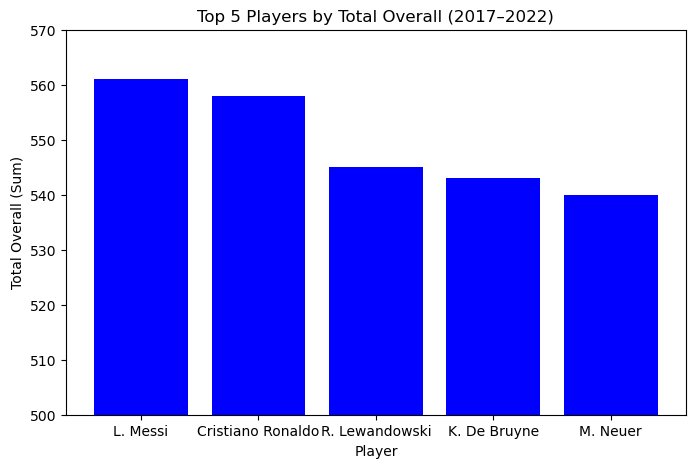

In [470]:
id_group = df_temp.groupby(['ID','Name'])['Overall'].sum().reset_index()
top5 = id_group.nlargest(5, 'Overall')

plt.figure(figsize=(8,5))
plt.bar(top5['Name'], top5['Overall'], color='blue')

plt.title("Top 5 Players by Total Overall (2017–2022)")
plt.xlabel("Player")
plt.ylabel("Total Overall (Sum)")
plt.ylim(500,570)
plt.show()

#### checking if there are any duplicates, if not then we can continue

In [471]:
players_list = ['L. Messi','Cristiano Ronaldo','R. Lewandowski','K. De Bruyne','M. Neuer']
for i in players_list:
    filt = df_temp['Name']==i
    l=len(df_temp.loc[filt,'Season'].value_counts())
    print(l)

6
6
6
6
6


#### thus, no duplicates, 6 seasons, 6 rows for all players

In [472]:
filt = df_temp['ID'].isin([158023,20801,188545,192985,167495])
players_df = df_temp.loc[filt,['ID','Name','Overall','Season']].reset_index()
players_df = players_df.drop('index',axis=1)
players_df.set_index('ID')

,Name,Overall,Season
ID,,,
20801,Cristiano Ronaldo,94,2017
158023,L. Messi,93,2017
192985,K. De Bruyne,88,2017
188545,R. Lewandowski,90,2017
167495,M. Neuer,92,2017
192985,K. De Bruyne,91,2018
20801,Cristiano Ronaldo,94,2018
158023,L. Messi,94,2018
188545,R. Lewandowski,91,2018


In [473]:
players_df.shape

(30, 4)

In [474]:
players_df = players_df.reset_index()

In [475]:
import plotly.express as px

fig = px.line(
    players_df,  
    x="Season",             
    y="Overall",            
    color="Name",           
    markers=True,           
    hover_data=["Overall"]       
)

fig.update_layout(
    title="Top 5 Players' Overall Development (2017–2022)",
    xaxis_title="Season",
    yaxis_title="Overall Rating",
    legend_title="Player",
    template="plotly_white"
)

fig.show()

## Inference from above graph:-
- The graph shows how consistent the top players are.
- Messi and Ronaldo being 'old' still having top tier rating.
- Kevin de Bruyne and Lewandowski showing their consistency and improvement respectively, which is phenomenal at their age.
- Neuer had a slight dip due to injury, he did start improving once he got back on the pitch.
- By 2022, Messi was 35, Ronaldo was 37, Lewandowski was 34, KDB was 31 and Neuer 36, usually players retire at this age but such players show real discipline and commitment to the sport.

In [476]:
filt = df_temp['ID'].isin([158023,20801,188545,192985,167495])
players_df_value = df_temp.loc[filt,['ID','Name','Overall','Season','Value (€)']].reset_index()
players_df_value = players_df_value.drop('index',axis=1)

In [477]:
players_df_value

,ID,Name,Overall,Season,Value (€)
0,20801,Cristiano Ronaldo,94,2017,87000000.0
1,158023,L. Messi,93,2017,89000000.0
2,192985,K. De Bruyne,88,2017,65500000.0
3,188545,R. Lewandowski,90,2017,71000000.0
4,167495,M. Neuer,92,2017,69500000.0
5,192985,K. De Bruyne,91,2018,104500000.0
6,20801,Cristiano Ronaldo,94,2018,95500000.0
7,158023,L. Messi,94,2018,118500000.0
8,188545,R. Lewandowski,91,2018,92000000.0
9,167495,M. Neuer,92,2018,61000000.0


In [478]:
fig = px.line(
    players_df_value,  
    x="Season",             
    y="Value (€)",            
    color="Name",           
    markers=True,           
    hover_data=["Overall"]       
)

fig.update_layout(
    title="Top 5 Players' Value (€) Fluctuation(2017–2022)",
    xaxis_title="Season",
    yaxis_title="Value (€)",
    legend_title="Player",
    template="plotly_white"
)

fig.show()

# Inference for above graph:-
- Messi's value peaked in 2018 and 2019. This corresponds well with the rating he had as well (94 in both seasons)
- Ronaldo's value started to decline due to age and drop in his consistency to perform. Even though his rating is top tier, his value decreases mainly due to age.
- KDB and Lewandowski's value kept increasing. This can be backed the overall rating graph above. Due to their consistency and improvement, their value kept increasing with time.
- Neuers value decreased due to his injury in 2017 and 2019. His age also plays a role in decrease of value and also, goalkeepers usually have lesser value than outfield players.

In [479]:
df_temp

,ID,Name,Age,Nationality,Overall,Potential,Club,Preferred Foot,Weak Foot,Skill Moves,...,Best Position,DefensiveAwareness,Season,Joined_Year,Joined_Month,Joined_Day,Value (€),Wage (€),Work Rate 1,Work Rate 2
0,176580,L. Suárez,29,Uruguay,92,92,FC Barcelona,Right,4.0,4.0,...,ST,42.320234,2017,2014,7,11,83000000.0,525000.0,High,Medium
1,178518,R. Nainggolan,28,Belgium,86,86,Roma,Right,3.0,3.0,...,CDM,81.126388,2017,2014,1,7,37500000.0,130000.0,High,High
2,181872,A. Vidal,29,Chile,87,87,FC Bayern München,Right,4.0,3.0,...,CDM,82.634765,2017,2015,7,28,41500000.0,180000.0,High,High
3,197445,D. Alaba,24,Austria,86,89,FC Bayern München,Left,4.0,3.0,...,LB,79.191519,2017,2010,2,10,41500000.0,140000.0,High,Medium
4,195864,P. Pogba,23,France,88,94,Manchester United,Right,4.0,5.0,...,CAM,68.487952,2017,2016,8,9,71500000.0,225000.0,High,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90834,259718,F. Gebhardt,19,Germany,52,66,FC Basel 1893,Right,3.0,1.0,...,GK,6.000000,2022,2020,11,1,170000.0,650.0,Medium,Medium
90835,251433,B. Voll,20,Germany,58,69,F.C. Hansa Rostock,Right,2.0,1.0,...,GK,5.000000,2022,2019,7,1,375000.0,950.0,Medium,Medium
90836,262846,. Dobre,20,Romania,53,63,FC Academica Clinceni,Right,2.0,1.0,...,GK,5.000000,2022,2018,7,28,180000.0,550.0,Medium,Medium
90837,241317,Xue Qinghao,19,China PR,47,60,Shanghai Shenhua FC,Right,2.0,1.0,...,GK,21.000000,2022,2021,4,19,100000.0,700.0,Medium,Medium


In [480]:
df_temp['Club'].value_counts()

Club
Manchester United                   221
Arsenal                             219
Chelsea                             217
Liverpool                           217
Tottenham Hotspur                   216
                                   ... 
Delfín Sporting Club                  1
Club Plaza de Deportes Colonia        1
Club Deportivo Oriente Petrolero      1
Club Atlético River Plate             1
Club Unión Magdalena S.A              1
Name: count, Length: 1087, dtype: int64

In [481]:
top_team_grp = df_temp.groupby(['Club','Season'])
total = top_team_grp['Overall'].sum()
count = top_team_grp['ID'].count()
total/count

Club                   Season
1. FC Heidenheim 1846  2017      65.727273
                       2018      66.250000
                       2019      65.357143
                       2020      67.388889
                       2021      65.750000
                                   ...    
Śląsk Wrocław          2018      63.043478
                       2019      62.538462
                       2020      63.250000
                       2021      62.117647
                       2022      63.666667
Length: 4205, dtype: float64

In [482]:
teams_df = (df_temp.groupby(['Club','Season'])['Overall'].mean().reset_index(name='Mean_Overall'))

In [483]:
top_teams_df = teams_df.groupby(['Club'])['Mean_Overall'].mean().reset_index().sort_values('Mean_Overall',ascending=False)
top_teams_df.head(5)

,Club,Mean_Overall
573,Juventus,80.232681
788,Real Madrid,78.672230
374,FC Barcelona,78.407922
679,Napoli,78.291899
377,FC Bayern München,78.108669


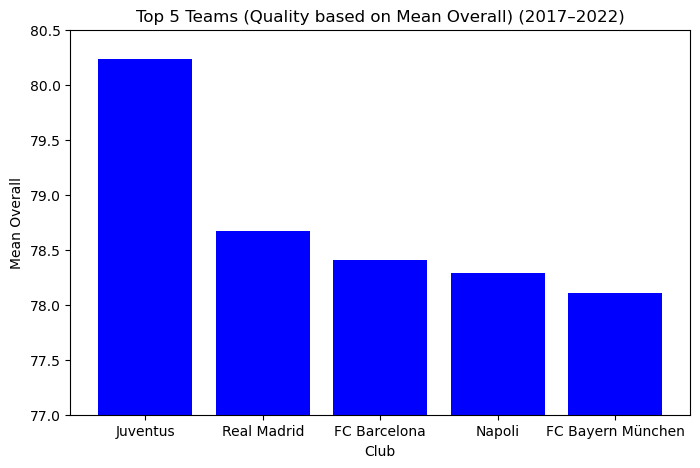

In [484]:
plt.figure(figsize=(8,5))
plt.bar(top_teams_df['Club'].head(5), top_teams_df['Mean_Overall'].head(5), color='blue')

plt.title("Top 5 Teams (Quality based on Mean Overall) (2017–2022)")
plt.xlabel("Club")
plt.ylabel("Mean Overall")
plt.ylim(77.0,80.5)
plt.show()

# Inference from above graph:-
- Teams like Juventus, Napoli are average on the pitch but look good on paper.
- Such teams have high mean overall, but their on pitch performance does not match that off the other 3 teams. This shows the gap between squad quality and actual results.
- The reason for this is given in the graphs below:-

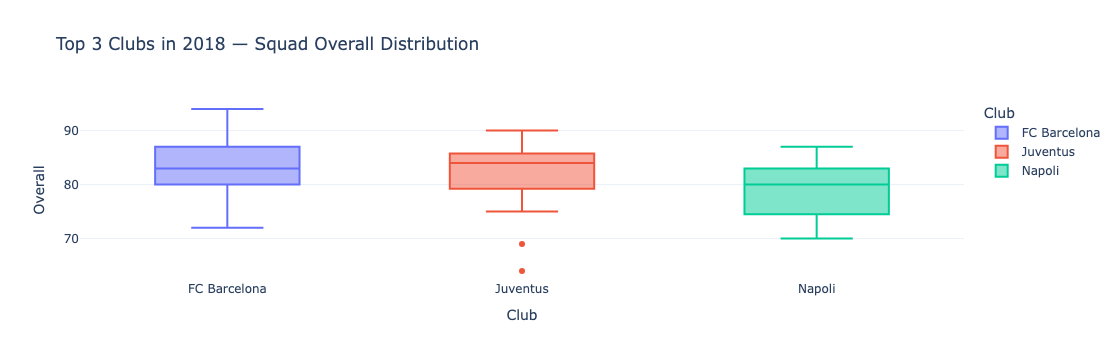

In [590]:
def get_club_mean_overall(df, season):
    top_3 = df[df['Season'] == season].groupby('Club')['Overall'].mean().reset_index(name='MeanOverall').sort_values('MeanOverall', ascending=False).head(3)['Club'].tolist()

    df_top3 = df[(df['Season'] == season) & (df['Club'].isin(top_3))]

    fig = px.box(
        df_top3,
        x="Club", y="Overall", color="Club",
        points="outliers",
        title=f"Top 3 Clubs in {season} — Squad Overall Distribution"
    )

    fig.update_layout(template="plotly_white")
    fig.show()
    
box_plot = get_club_mean_overall(df_temp, 2018)
box_plot

# Inference for above graph:-
- In order to understand the bar graph above, we made a function in which if you pass in the df and year, you will get the top 3 teams from that year (season) and info on overall of players of the team using box plot.
- Here we notice that teams like Juventus and Napoli are a part of the top 3 quite frequently.
- The best teams that we know of are not always a part of the top 3 even though the teams perform exceptionally on the pitch.
- This shows that high squad ratings alone are not sufficient, success also depends on team chemistry, tactics, and coaching strategy.

In [486]:
top_club_grp=df_temp.groupby(['Club','Season'])
top_clubs_df=top_club_grp['Overall'].mean().reset_index(name='Mean Overall')

my_clubs=['FC Barcelona','Juventus','Paris Saint-Germain','Manchester City','FC Bayern München']
final_top_clubs_df=top_clubs_df[top_clubs_df['Club'].isin(my_clubs)]
final_top_clubs_df

,Club,Season,Mean Overall
1393,FC Barcelona,2017,78.312500
1394,FC Barcelona,2018,83.285714
1395,FC Barcelona,2019,77.774194
1396,FC Barcelona,2020,78.062500
1397,FC Barcelona,2021,76.527778
1398,FC Barcelona,2022,76.484848
1406,FC Bayern München,2017,75.576923
1407,FC Bayern München,2018,76.333333
1408,FC Bayern München,2019,76.142857
1409,FC Bayern München,2020,81.450000


<Axes: xlabel='Season', ylabel='Club'>

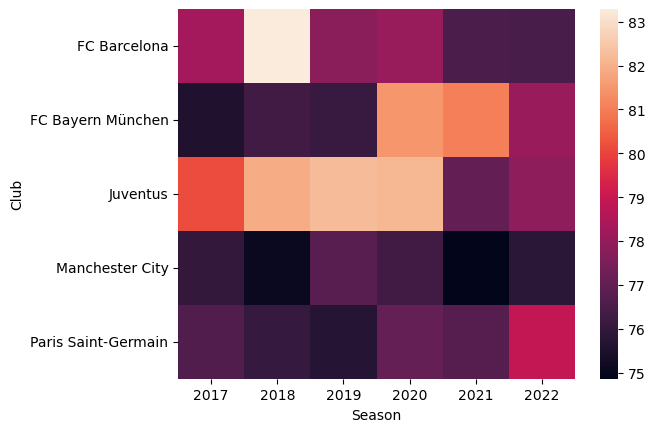

In [487]:
sns.heatmap(final_top_clubs_df.pivot_table(values='Mean Overall',index='Club',columns='Season'))

# Ineference from above graph:-
- FC Barcelona peaked around 2018 but saw a sharp decline after 2019 due to financial instability and departure of key players.
- Bayern Munchen have shown a good growth in team overall. This was reflected on the pitch as well as they went on to win their 10th consecutive league title in 2022.
- Juventus had strong players but their overall declined after 2021, especially post-Ronaldo’s exit.
- Manchester City were still developing during this period, with players like Kevin De Bruyne leading this team growth.
- Paris Saint-German showed gradual signs of improvement till 2022.

## Loyalty Test:-

In [488]:
combined_df.columns

Index(['ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag', 'Overall',
       'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'Crossing', 'Finishing', 'HeadingAccuracy',
       'ShortPassing', 'Volleys', 'Dribbling', 'Curve', 'FKAccuracy',
       'LongPassing', 'BallControl', 'Acceleration', 'SprintSpeed', 'Agility',
       'Reactions', 'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength',
       'LongShots', 'Aggression', 'Interceptions', 'Positioning', 'Vision',
       'Penalties', 'Composure', 'Marking', 'StandingTackle', 'SlidingTackle',
       'GKDiving', 'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes',
       'Best Position', 'Best Overall Rating', 'DefensiveAwareness', 'Season'],
      dtype='object')

In [489]:
combined_df['Contract Valid Until'].isna().sum()

2536

In [490]:
combined_df['Joined'].isna().sum()

10461

In [491]:
df_temp.columns

Index(['ID', 'Name', 'Age', 'Nationality', 'Overall', 'Potential', 'Club',
       'Preferred Foot', 'Weak Foot', 'Skill Moves', 'Work Rate',
       'Jersey Number', 'Height', 'Weight', 'Crossing', 'Finishing',
       'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling', 'Curve',
       'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling',
       'GKKicking', 'GKPositioning', 'GKReflexes', 'Best Position',
       'DefensiveAwareness', 'Season', 'Joined_Year', 'Joined_Month',
       'Joined_Day', 'Value (€)', 'Wage (€)', 'Work Rate 1', 'Work Rate 2'],
      dtype='object')

In [492]:
df_temp['Joined_Year'].isna().sum()

0

In [493]:
df_temp.loc[df_temp['Name'] == 'M. Hummels']

,ID,Name,Age,Nationality,Overall,Potential,Club,Preferred Foot,Weak Foot,Skill Moves,...,Best Position,DefensiveAwareness,Season,Joined_Year,Joined_Month,Joined_Day,Value (€),Wage (€),Work Rate 1,Work Rate 2
402,178603,M. Hummels,27,Germany,88,88,FC Bayern München,Right,3.0,2.0,...,CB,84.051973,2017,2016,7,1,43000000.0,200000.0,High,Medium
16137,178603,M. Hummels,28,Germany,90,90,FC Bayern München,Right,3.0,2.0,...,CB,85.839309,2018,2016,7,1,62500000.0,225000.0,High,Medium
32480,178603,M. Hummels,29,Germany,88,88,FC Bayern München,Right,3.0,3.0,...,CB,84.422101,2019,2016,7,1,46000000.0,160000.0,High,Medium
48406,178603,M. Hummels,30,Germany,87,87,Borussia Dortmund,Right,3.0,3.0,...,CB,90.000000,2020,2019,7,1,41000000.0,125000.0,High,High
62038,178603,M. Hummels,31,Germany,86,86,Borussia Dortmund,Right,3.0,3.0,...,CB,90.000000,2021,2019,7,1,33000000.0,93000.0,High,High
76901,178603,M. Hummels,32,Germany,86,86,Borussia Dortmund,Right,3.0,3.0,...,CB,90.000000,2022,2019,7,1,44000000.0,95000.0,High,High


## Reason for showing the above df  is:-
- The Joined_Year column in the dataset refers to the year a player joined their current club (via transfer), not their first professional signing year.
- For example, Mats Hummels used to play for Borussia Dortmun since 2009, he then left in 2016 to join Bayern Munchen (as shown above).
- Later, he re-joined Borussia Dortmund in 2019 (as shwon above). Thus proving that Joined_Year is based on transfer year and not first professional signing year.

In [494]:
loyal_df = (
    df_temp
    .groupby(['ID', 'Name', 'Club'])
    .agg(
        Joined_Year=('Joined_Year', 'min'),      
        Final_Season=('Season', 'max'),
        Overall=('Overall','max')
    )
    .reset_index()
)

In [495]:
loyal_df['Total Years Spent'] = loyal_df['Final_Season'] - loyal_df['Joined_Year']

In [496]:
loyal_df.columns

Index(['ID', 'Name', 'Club', 'Joined_Year', 'Final_Season', 'Overall',
       'Total Years Spent'],
      dtype='object')

In [497]:
loyal_players_df = loyal_df.loc[loyal_df['Overall']>85].sort_values('Total Years Spent',ascending=False).head(10)
loyal_players_df

,ID,Name,Club,Joined_Year,Final_Season,Overall,Total Years Spent
18,1179,G. Buffon,Juventus,2001,2021,89,20
877,138956,G. Chiellini,Juventus,2005,2022,90,17
1853,158023,L. Messi,FC Barcelona,2004,2021,94,17
1649,155862,Sergio Ramos,Real Madrid,2005,2021,90,16
3,41,Iniesta,FC Barcelona,2002,2017,88,15
7592,189596,T. Müller,FC Bayern München,2008,2022,87,14
4079,176676,Marcelo,Real Madrid,2007,2021,87,14
1503,152729,Piqué,FC Barcelona,2008,2022,88,14
7540,189511,Sergio Busquets,FC Barcelona,2008,2022,89,14
2580,165153,K. Benzema,Real Madrid CF,2009,2022,89,13


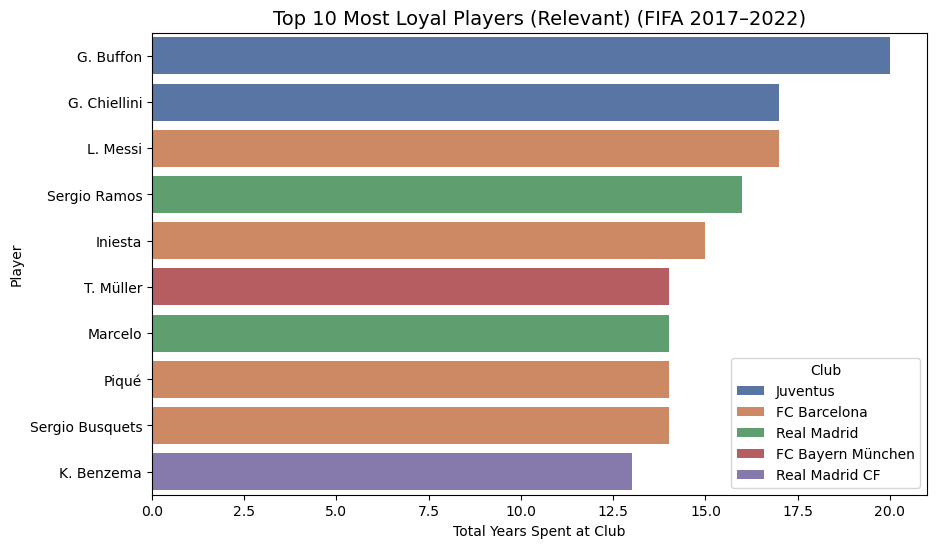

In [498]:
plt.figure(figsize=(10,6))
sns.barplot(
    data=loyal_players_df,
    x="Total Years Spent",
    y="Name",
    hue="Club",
    palette="deep"
)

plt.title("Top 10 Most Loyal Players (Relevant) (FIFA 2017–2022)", fontsize=14)
plt.xlabel("Total Years Spent at Club")
plt.ylabel("Player")
plt.legend(title="Club")
plt.show()

# Inference from above graph:-
- Players like Messi, Inietsa, Ramos, etc represent the backbone of their clubs, staying loyal for over a decade.
- Such loyalty is rare in modern football, where frequent transfers are very common.
- These players not only provided consistency but also shaped the identity of their clubs during this era.

In [499]:
club_values = (
    df_temp.groupby('Club')['Value (€)']
    .mean()
    .sort_values(ascending=False)
)
rich_clubs = club_values.head(20).index.tolist()
poor_clubs = club_values.tail(20).index.tolist()

In [500]:
loyal_youths = (
    df_temp.groupby(['ID','Name','Club'])
    .agg(
        Seasons_Spent=('Season','nunique'),
        Start_Season=('Season','min'),
        End_Season=('Season','max'),
        Start_Overall=('Overall','first'),
        End_Overall=('Overall','last'),
        Joined_Year=('Joined_Year','min'),
        Age=('Age','min')
    )
    .reset_index()
)

loyal_youths = loyal_youths[(loyal_youths['Age'] <= 24) & (loyal_youths['Seasons_Spent'] >= 3)]

In [501]:
loyal_youths['Growth'] = loyal_youths['End_Overall'] - loyal_youths['Start_Overall']

rich_club_player = loyal_youths[loyal_youths['Club'].isin(rich_clubs)].sort_values('Growth', ascending=False).head(2)
poor_club_player = loyal_youths[loyal_youths['Club'].isin(poor_clubs)].sort_values('Growth', ascending=False).head(2)

In [502]:
rich_club_player

,ID,Name,Club,Seasons_Spent,Start_Season,End_Season,Start_Overall,End_Overall,Joined_Year,Age,Growth
32055,233064,M. Mount,Chelsea,4,2017,2022,58,83,2016,17,25
36911,238074,R. James,Chelsea,4,2018,2022,59,81,2017,17,22


In [503]:
poor_club_player

,ID,Name,Club,Seasons_Spent,Start_Season,End_Season,Start_Overall,End_Overall,Joined_Year,Age,Growth
36760,237927,E. McGinty,Sligo Rovers,6,2017,2022,50,64,2017,16,14
28507,229771,C. McCarthy,Cork City,3,2017,2019,51,61,2015,18,10


In [504]:
growth_df = pd.concat([rich_club_player,poor_club_player],ignore_index=True)

In [505]:
growth_df

,ID,Name,Club,Seasons_Spent,Start_Season,End_Season,Start_Overall,End_Overall,Joined_Year,Age,Growth
0,233064,M. Mount,Chelsea,4,2017,2022,58,83,2016,17,25
1,238074,R. James,Chelsea,4,2018,2022,59,81,2017,17,22
2,237927,E. McGinty,Sligo Rovers,6,2017,2022,50,64,2017,16,14
3,229771,C. McCarthy,Cork City,3,2017,2019,51,61,2015,18,10


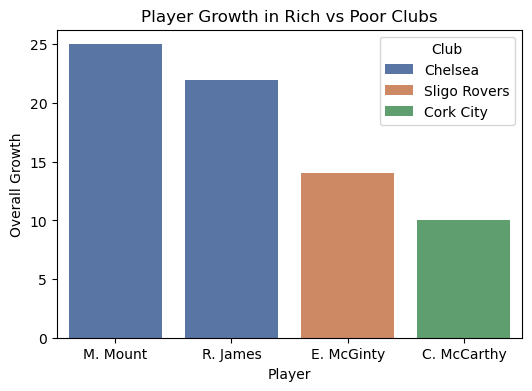

In [506]:
plt.figure(figsize=(6,4))
sns.barplot(
    data=growth_df,
    x="Name", 
    y="Growth", 
    hue="Club",
    palette="deep"
)

plt.title("Player Growth in Rich vs Poor Clubs")
plt.ylabel("Overall Growth")
plt.xlabel("Player")
plt.legend(title="Club")
plt.show()

# Inference from above graph:-
- Players from wealthy clubs (Chelsea) show significantly higher growth in their ratings compared to players from smaller clubs (Sligo Rovers, Cork City)
- This reflects the advantages of better infrastructure, coaching, and competition levels in rich clubs.

## Loan Masters:-

In [559]:
combined_df.columns

Index(['ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag', 'Overall',
       'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'Crossing', 'Finishing', 'HeadingAccuracy',
       'ShortPassing', 'Volleys', 'Dribbling', 'Curve', 'FKAccuracy',
       'LongPassing', 'BallControl', 'Acceleration', 'SprintSpeed', 'Agility',
       'Reactions', 'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength',
       'LongShots', 'Aggression', 'Interceptions', 'Positioning', 'Vision',
       'Penalties', 'Composure', 'Marking', 'StandingTackle', 'SlidingTackle',
       'GKDiving', 'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes',
       'Best Position', 'Best Overall Rating', 'DefensiveAwareness', 'Season'],
      dtype='object')

In [563]:
combined_df.isna().sum().head(30)

ID                              0
Name                            0
Age                             0
Photo                           0
Nationality                     0
Flag                            0
Overall                         0
Potential                       0
Club                         1710
Club Logo                       0
Value                           0
Wage                            0
Special                         0
Preferred Foot                  0
International Reputation        0
Weak Foot                       0
Skill Moves                     0
Work Rate                       0
Body Type                      81
Real Face                      81
Position                      117
Jersey Number                 117
Joined                      10461
Loaned From                 96509
Contract Valid Until         2536
Height                          0
Weight                          0
Crossing                        0
Finishing                       0
HeadingAccurac

In [564]:
loan_master_df = combined_df.copy(deep=True)

In [565]:
loan_master_df = loan_master_df[['Club','Loaned From']]

In [566]:
loan_master_df.dropna(inplace=True)

In [567]:
loan_master_df.shape

(7843, 2)

In [573]:
x = loan_master_df.groupby('Club')['Loaned From'].count().reset_index(name='total loans')
loan_masters = x.sort_values('total loans',ascending=False).nlargest(5,'total loans')

In [574]:
loan_masters

,Club,total loans
672,Sangju Sangmu FC,81
224,Defensa y Justicia,56
391,Hellas Verona,53
134,CD Leganés,51
771,US Salernitana 1919,47


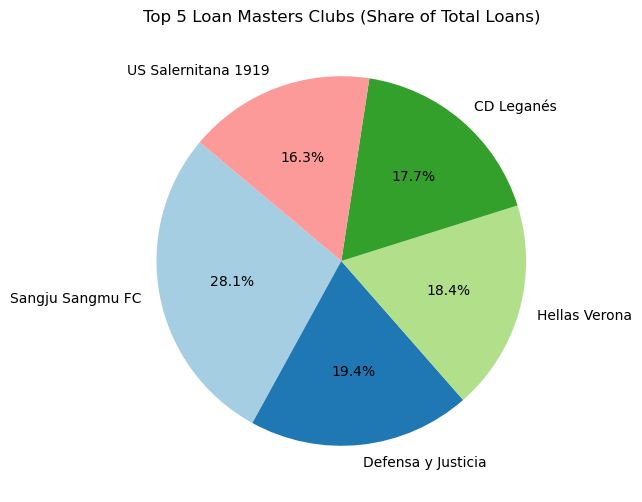

In [578]:
plt.figure(figsize=(6,6))
plt.pie(loans, labels=clubs, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title("Top 5 Loan Masters Clubs (Share of Total Loans)")
plt.show()

## Inference from above graph:-
- Sangju Sangmu FC dominates the loan market, accounting for over a quarter (28.1%) of total loans among the top 5 clubs.
- The other clubs — Defensa y Justicia, Hellas Verona, CD Leganés, and US Salernitana 1919 — each contribute between 16–19%, showing a more balanced share.
- This indicates that while multiple clubs rely heavily on loaning players, Sangju Sangmu FC stands out as the clear leader in loan transactions.

#### **Dropping insignificant columns:-** (wrt model prediction, target = overall)

In [507]:
df.columns

Index(['ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag', 'Overall',
       'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'Crossing', 'Finishing', 'HeadingAccuracy',
       'ShortPassing', 'Volleys', 'Dribbling', 'Curve', 'FKAccuracy',
       'LongPassing', 'BallControl', 'Acceleration', 'SprintSpeed', 'Agility',
       'Reactions', 'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength',
       'LongShots', 'Aggression', 'Interceptions', 'Positioning', 'Vision',
       'Penalties', 'Composure', 'Marking', 'StandingTackle', 'SlidingTackle',
       'GKDiving', 'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes',
       'Best Position', 'Best Overall Rating', 'DefensiveAwareness', 'Season'],
      dtype='object')

In [508]:
columns_to_drop = ['ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag',
                   'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
                   'Preferred Foot', 'International Reputation',
                   'Body Type', 'Real Face', 'Position',
                   'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
                   'Height', 'Weight','Best Position', 'Best Overall Rating','Season']

In [509]:
df.drop(columns = columns_to_drop,axis=1,inplace=True)

In [510]:
df.columns

Index(['Overall', 'Weak Foot', 'Skill Moves', 'Work Rate', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling',
       'GKKicking', 'GKPositioning', 'GKReflexes', 'DefensiveAwareness'],
      dtype='object')

In [511]:
df.isna().sum()

Overall                   0
Weak Foot                 0
Skill Moves               0
Work Rate                 0
Crossing                  0
Finishing                 0
HeadingAccuracy           0
ShortPassing              0
Volleys                 115
Dribbling                 0
Curve                   115
FKAccuracy                0
LongPassing               0
BallControl               0
Acceleration              0
SprintSpeed               0
Agility                 115
Reactions                 0
Balance                 115
ShotPower                 0
Jumping                 115
Stamina                   0
Strength                  0
LongShots                 0
Aggression                0
Interceptions            15
Positioning              15
Vision                  115
Penalties                 0
Composure               958
Marking               47402
StandingTackle            0
SlidingTackle           115
GKDiving                  0
GKHandling                0
GKKicking           

#### Reason to drop Marking:-

In [512]:
47402/104352

0.4542509966268016

In [513]:
df.drop('Marking',axis=1,inplace=True)

In [514]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104352 entries, 0 to 104351
Data columns (total 38 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Overall             104352 non-null  int64  
 1   Weak Foot           104352 non-null  float64
 2   Skill Moves         104352 non-null  float64
 3   Work Rate           104352 non-null  object 
 4   Crossing            104352 non-null  float64
 5   Finishing           104352 non-null  float64
 6   HeadingAccuracy     104352 non-null  float64
 7   ShortPassing        104352 non-null  float64
 8   Volleys             104237 non-null  float64
 9   Dribbling           104352 non-null  float64
 10  Curve               104237 non-null  float64
 11  FKAccuracy          104352 non-null  float64
 12  LongPassing         104352 non-null  float64
 13  BallControl         104352 non-null  float64
 14  Acceleration        104352 non-null  float64
 15  SprintSpeed         104352 non-nul

In [515]:
df = df.drop('Work Rate',axis=1)

In [516]:
df = df.dropna()

In [517]:
df.shape

(100832, 37)

In [518]:
104352 - 100832

3520

In [519]:
df

,Overall,Weak Foot,Skill Moves,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,...,Penalties,Composure,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,DefensiveAwareness
0,92,4.0,4.0,77.0,94.0,77.0,83.0,88.0,86.0,86.0,...,85.0,83.0,45.0,38.0,27.0,25.0,31.0,33.0,37.0,42.320234
1,86,3.0,3.0,73.0,76.0,59.0,84.0,75.0,80.0,73.0,...,63.0,85.0,85.0,88.0,11.0,11.0,14.0,8.0,11.0,81.126388
2,87,4.0,3.0,76.0,77.0,81.0,84.0,78.0,76.0,76.0,...,84.0,86.0,89.0,84.0,4.0,2.0,4.0,2.0,4.0,82.634765
3,86,4.0,3.0,82.0,63.0,75.0,83.0,68.0,79.0,78.0,...,80.0,79.0,83.0,83.0,5.0,7.0,14.0,15.0,9.0,79.191519
4,88,4.0,5.0,78.0,71.0,73.0,85.0,84.0,89.0,84.0,...,76.0,83.0,73.0,73.0,5.0,6.0,2.0,4.0,3.0,68.487952
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104345,52,3.0,1.0,13.0,9.0,13.0,22.0,5.0,12.0,12.0,...,10.0,33.0,12.0,10.0,53.0,45.0,47.0,52.0,57.0,6.000000
104346,58,2.0,1.0,8.0,9.0,11.0,23.0,7.0,11.0,11.0,...,7.0,29.0,12.0,10.0,59.0,60.0,56.0,55.0,61.0,5.000000
104348,53,2.0,1.0,13.0,7.0,10.0,17.0,7.0,6.0,11.0,...,12.0,29.0,13.0,12.0,57.0,52.0,53.0,48.0,58.0,5.000000
104349,47,2.0,1.0,12.0,9.0,14.0,15.0,6.0,8.0,12.0,...,15.0,17.0,11.0,9.0,49.0,48.0,45.0,38.0,52.0,21.000000


In [520]:
df.columns

Index(['Overall', 'Weak Foot', 'Skill Moves', 'Crossing', 'Finishing',
       'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling', 'Curve',
       'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling',
       'GKKicking', 'GKPositioning', 'GKReflexes', 'DefensiveAwareness'],
      dtype='object')

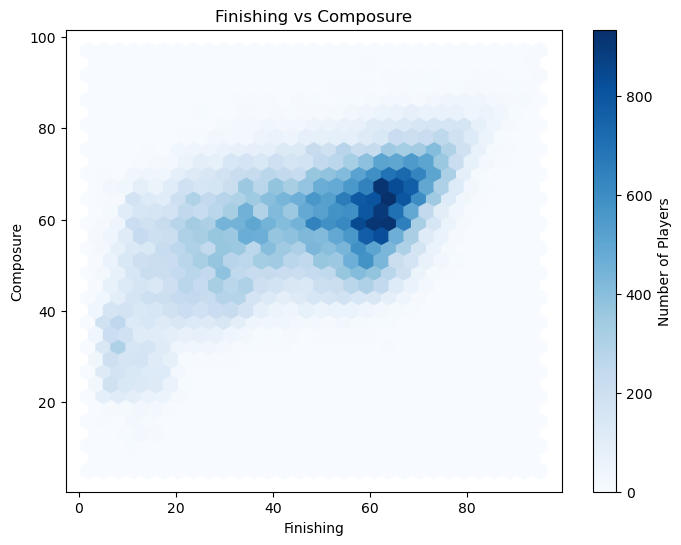

In [521]:
plt.figure(figsize=(8,6))
plt.hexbin(
    df['Finishing'], 
    df['Composure'], 
    gridsize=30,
    cmap='Blues',
)
plt.colorbar(label="Number of Players")
plt.xlabel("Finishing")
plt.ylabel("Composure")
plt.title("Finishing vs Composure")
plt.show()

# Inference for above graph:-
-  To understand relation between composure and finishing.
-  When a player is in front of the goal, he must stay calm and composed in order to perform a tidy finish into the back of the net.
-  This kind of composure is only developed through experience.
-  Many players have common rating of composure and finishing and very few players are in the higher zone.
-  The players on the lower side of the rating can be goal keepers, even defenders and very below average players.

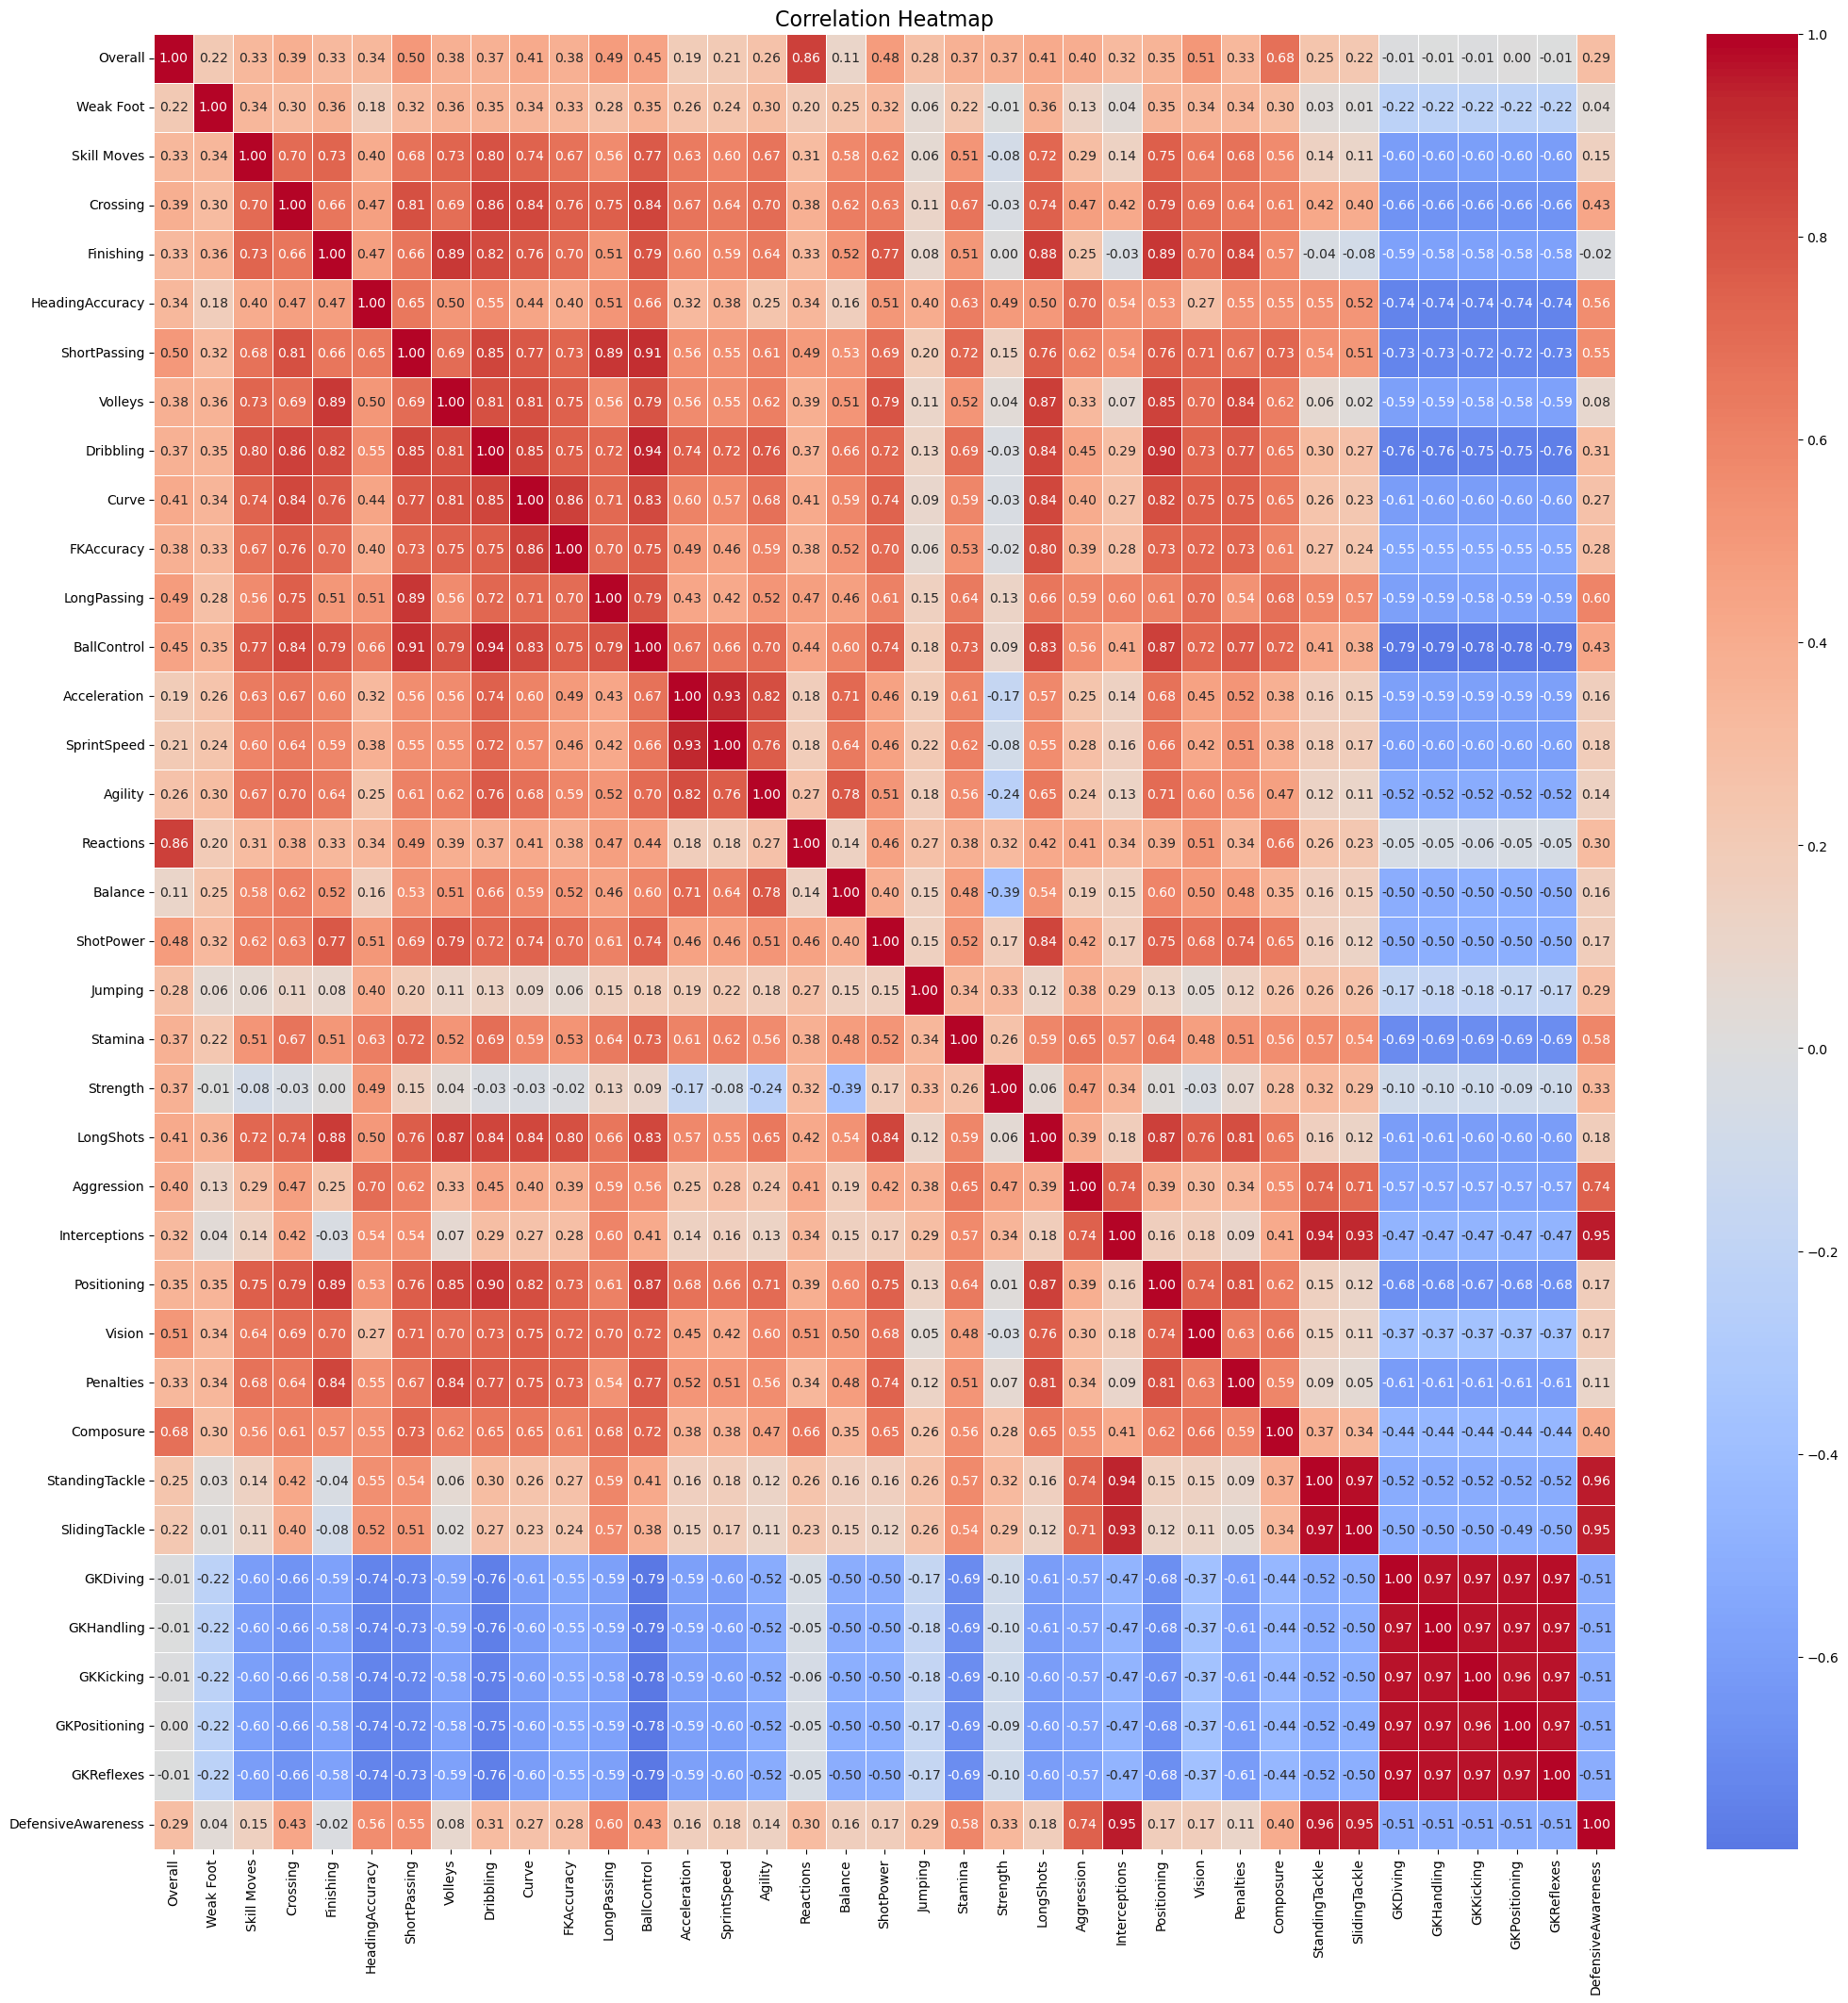

In [522]:
plt.figure(figsize=(25,25))
sns.heatmap(
    df.corr(), 
    annot=True,
    fmt=".2f",
    cmap="coolwarm", 
    center=0, 
    linewidths=0.5
)
plt.title("Correlation Heatmap", fontsize=16)
plt.show()

# Inference from above correlation matrix:-
-  To understand how much each features influence the target as well as other features.
-  We observe here that all the GK stats have no relation, ie they do not contribute to prediction of the target column and thus we drop them.
-  We notice that Reactions,Ball Control,Composure,Vision,Long & ShortPassing,ShotPower play a significant role in contributing to prediction of overall (each having around 0.5 or more proportionality)

In [523]:
df = df.drop(columns=['GKDiving','GKHandling','GKKicking','GKPositioning','GKReflexes'],axis=1)

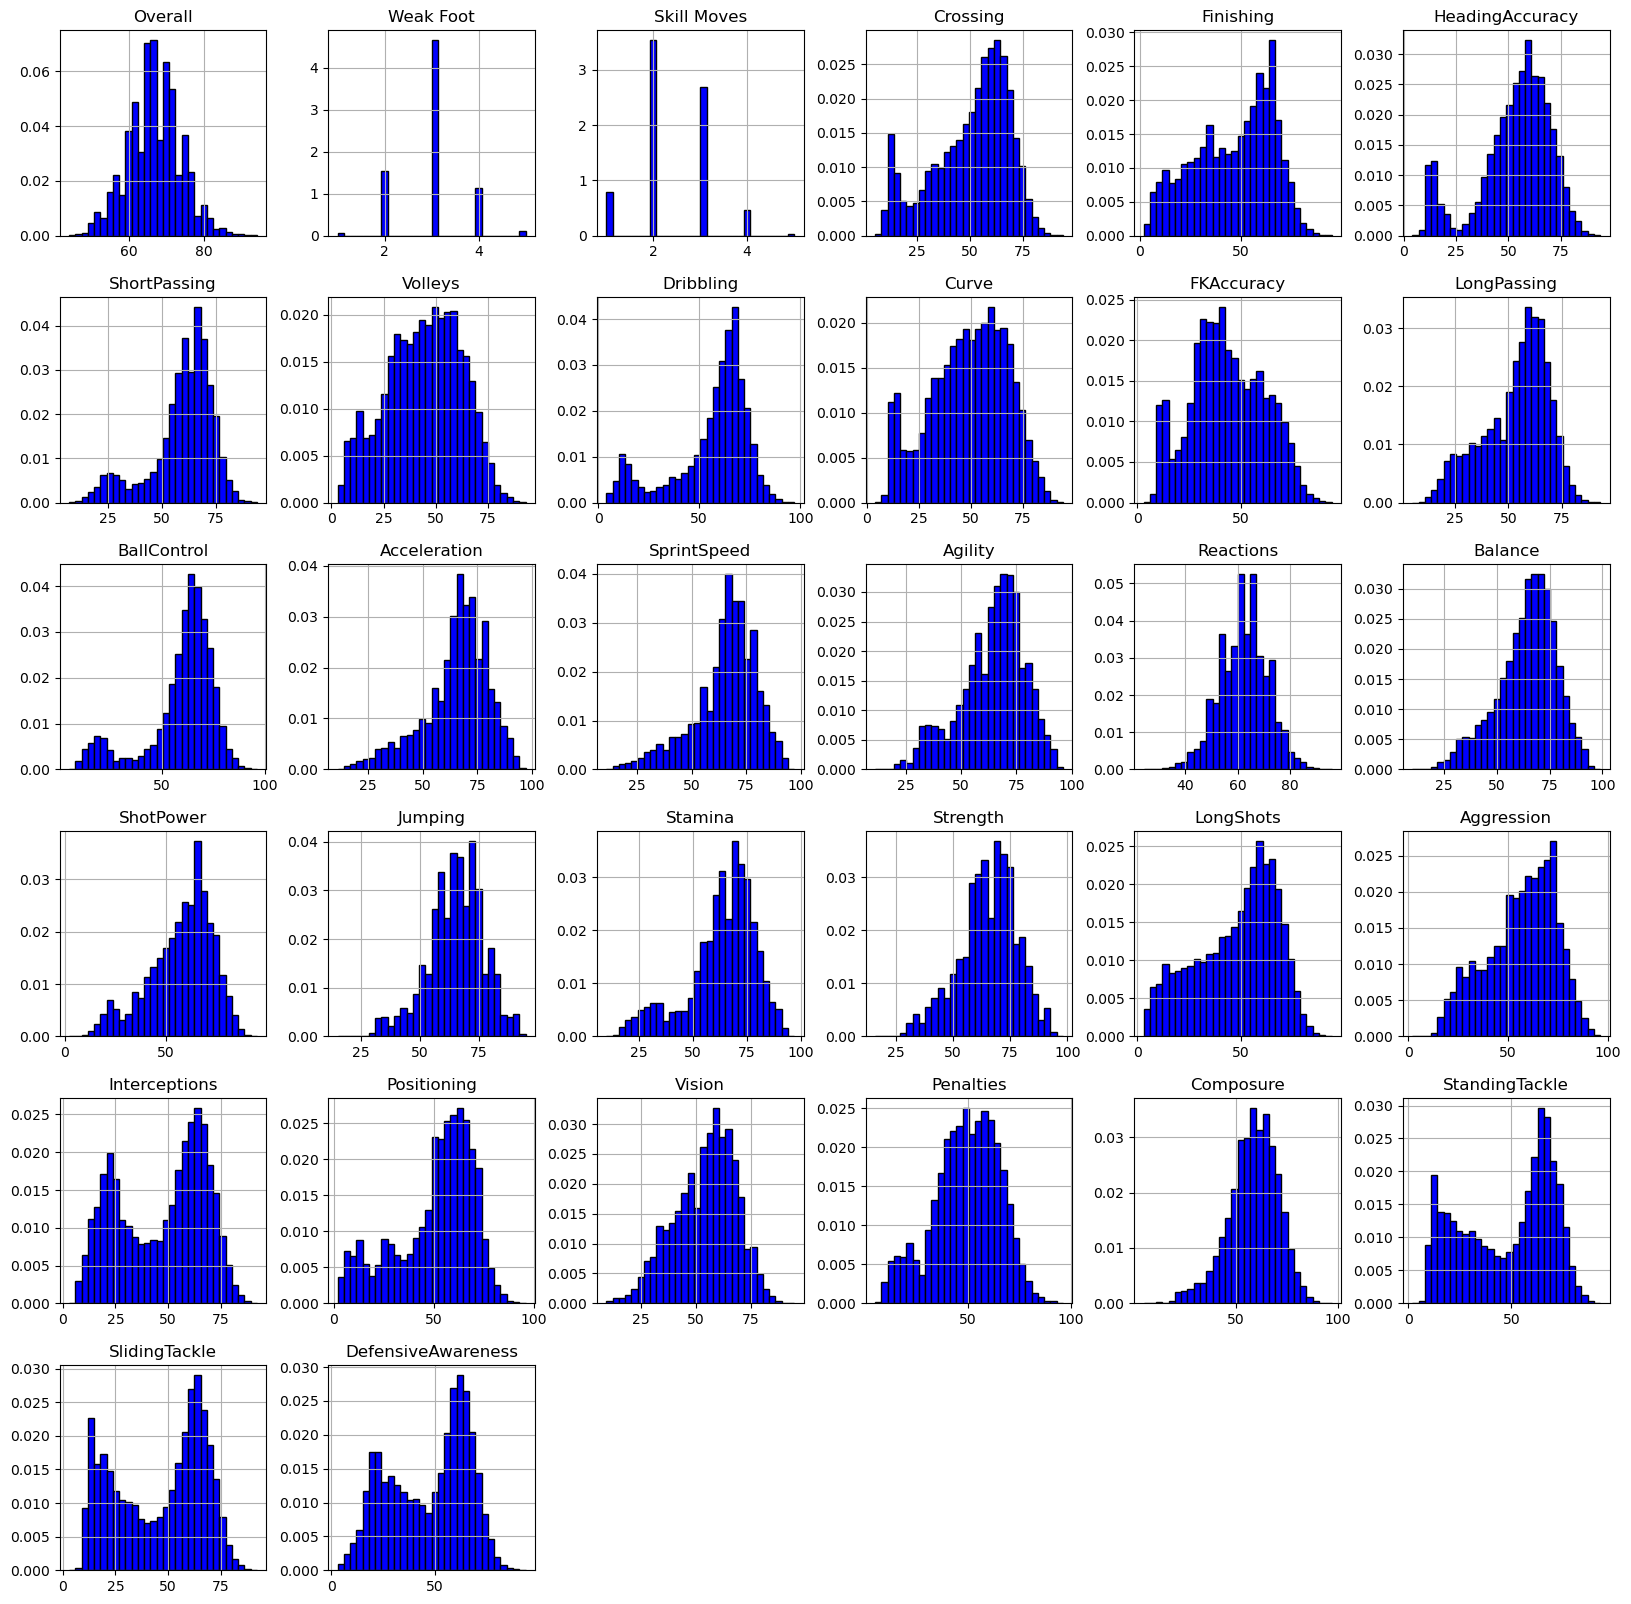

In [524]:
df.hist(figsize=(20,20), bins=30, color="blue", edgecolor="black",density=True)
plt.show()

# Inference of above graphs:-
- Most stats are not evenly spread — many are either skewed or have two peaks.
- This makes sense because attackers and defenders are strong in very different skills.
- Some features like Weak Foot and Skill Moves are more like discrete, not continuous numbers.
- Most physical and technical stats stay around average values, with only a few players standing out as exceptional.
- Looking at this helps us know how to clean the data (like handling outliers or scaling) and also gives a clearer picture of how players differ in their abilities.

In [525]:
df.describe()

,Overall,Weak Foot,Skill Moves,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,...,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,StandingTackle,SlidingTackle,DefensiveAwareness
count,100832.000000,100832.000000,100832.00000,100832.000000,100832.000000,100832.000000,100832.000000,100832.000000,100832.000000,100832.000000,...,100832.000000,100832.000000,100832.000000,100832.000000,100832.000000,100832.000000,100832.000000,100832.000000,100832.000000,100832.000000
mean,66.552632,2.962066,2.38702,50.491709,46.444403,52.740787,59.347905,43.711094,56.355889,48.180250,...,47.861334,56.291435,46.833515,50.869615,54.164462,49.143456,58.597836,47.970129,45.896104,47.058558
std,6.934362,0.665879,0.76857,18.196074,19.522125,17.257308,14.480922,17.716651,18.656590,18.349547,...,19.214540,17.238701,20.751823,19.421973,14.011538,15.703741,12.283173,21.612638,21.265675,19.086460
min,44.000000,1.000000,1.00000,5.000000,2.000000,4.000000,7.000000,3.000000,4.000000,4.000000,...,3.000000,2.000000,3.000000,2.000000,9.000000,5.000000,5.000000,2.000000,3.000000,3.000000
25%,62.000000,3.000000,2.00000,39.000000,31.000000,45.000000,54.000000,31.000000,50.000000,35.000000,...,34.000000,45.000000,26.000000,40.000000,45.000000,39.000000,51.000000,27.000000,24.000000,29.299796
50%,67.000000,3.000000,2.00000,55.000000,50.000000,56.000000,63.000000,45.000000,62.000000,50.000000,...,52.000000,59.000000,52.000000,56.000000,56.000000,50.000000,60.000000,55.000000,52.000000,52.000000
75%,71.000000,3.000000,3.00000,64.000000,62.000000,65.000000,69.000000,57.000000,69.000000,63.000000,...,63.000000,70.000000,64.000000,65.000000,65.000000,61.000000,67.000000,66.000000,64.000000,63.000000
max,94.000000,5.000000,5.00000,94.000000,95.000000,94.000000,94.000000,93.000000,97.000000,94.000000,...,94.000000,96.000000,92.000000,96.000000,95.000000,96.000000,97.000000,93.000000,92.000000,94.000000


## **Model Fitting (for Overall):-**

In [526]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler

x = df.drop('Overall',axis=1)
y = df['Overall']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [527]:
scaler = RobustScaler()
scaler.fit(x_train)
x_train_scaled=scaler.transform(x_train)
x_test_scaled=scaler.transform(x_test)

In [528]:
x_train_scaled

array([[ 0.        ,  0.        , -0.84      , ...,  0.12820513,
         0.075     , -0.05936007],
       [ 0.        ,  1.        ,  0.2       , ..., -0.71794872,
        -0.55      , -0.67046499],
       [ 0.        ,  1.        ,  0.12      , ..., -0.43589744,
        -0.2       , -0.48684964],
       ...,
       [ 0.        ,  1.        , -0.52      , ..., -1.        ,
        -0.975     , -0.59360073],
       [ 0.        ,  2.        ,  0.48      , ..., -0.58974359,
        -0.5       , -0.70073467],
       [ 0.        ,  1.        ,  0.48      , ...,  0.33333333,
         0.325     ,  0.44520055]])

In [529]:
x_train_scaled = pd.DataFrame(x_train_scaled,columns=x_train.columns)
x_test_scaled = pd.DataFrame(x_test_scaled,columns=x_test.columns)

In [530]:
x_train_scaled

,Weak Foot,Skill Moves,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,...,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,StandingTackle,SlidingTackle,DefensiveAwareness
0,0.0,0.0,-0.84,-0.806452,-0.50,-0.466667,-0.653846,-1.157895,-0.555556,-0.230769,...,-0.689655,-0.28,-0.131579,-1.00,-0.65,-0.363636,-1.3125,0.128205,0.075,-0.059360
1,0.0,1.0,0.20,-0.032258,-0.40,0.133333,0.346154,0.000000,0.444444,0.307692,...,0.000000,-0.72,-0.710526,0.12,-0.10,-0.045455,-0.0625,-0.717949,-0.550,-0.670465
2,0.0,1.0,0.12,-0.096774,-0.70,-0.533333,0.269231,-0.105263,-0.148148,-0.115385,...,-0.310345,-0.92,-0.684211,-0.20,-0.10,0.681818,-0.4375,-0.435897,-0.200,-0.486850
3,0.0,1.0,0.60,0.290323,-0.85,0.933333,0.576923,0.578947,0.740741,0.961538,...,0.689655,0.68,-0.078947,0.56,0.95,0.909091,0.1875,0.102564,0.050,-0.207760
4,1.0,1.0,0.48,0.258065,-0.70,0.266667,0.884615,0.631579,0.888889,0.769231,...,0.620690,-0.80,-0.842105,0.12,0.15,0.545455,-0.0625,-1.000000,-0.950,-0.445201
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80660,-1.0,2.0,0.92,0.903226,-0.80,0.666667,0.730769,1.000000,0.370370,-0.153846,...,0.241379,-1.16,-0.736842,0.60,0.25,0.636364,0.4375,-0.589744,-0.550,-0.831041
80661,0.0,0.0,-0.68,0.806452,0.20,-0.333333,0.846154,0.000000,-0.296296,-0.192308,...,0.275862,-0.92,-0.894737,0.36,-0.30,0.545455,0.0000,-0.820513,-0.825,-0.979441
80662,0.0,1.0,-0.52,0.645161,1.00,-0.733333,0.615385,0.105263,0.000000,0.038462,...,0.344828,-0.08,-0.473684,0.28,-0.70,0.727273,0.7500,-1.000000,-0.975,-0.593601
80663,0.0,2.0,0.48,0.645161,-0.35,0.600000,1.076923,0.947368,0.444444,0.384615,...,0.172414,-0.96,-0.894737,0.28,0.55,0.863636,0.7500,-0.589744,-0.500,-0.700735


In [531]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

rf = RandomForestRegressor(
    n_estimators=300,     
    max_depth=20,       
    min_samples_leaf=2,   
    max_features='sqrt',  
    n_jobs=-1,            
    random_state=42,
    bootstrap=True
)
rf.fit(x_train_scaled, y_train)

,n_estimators,300
,criterion,'squared_error'
,max_depth,20
,min_samples_split,2
,min_samples_leaf,2
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [532]:
pred = rf.predict(x_test_scaled)
print("RMSE:", np.sqrt(mean_squared_error(y_test, pred)))
print("R^2 :", r2_score(y_test, pred))

RMSE: 1.2585156724915607
R^2 : 0.9668412319495063


In [533]:
rf.fit(x_train, y_train)

,n_estimators,300
,criterion,'squared_error'
,max_depth,20
,min_samples_split,2
,min_samples_leaf,2
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [534]:
pred = rf.predict(x_test)
print("RMSE:", np.sqrt(mean_squared_error(y_test, pred)))
print("R^2 :", r2_score(y_test, pred))

RMSE: 1.2591925874588186
R^2 : 0.9668055522940523


### Thus scaling does not matter for Tree based models

In [535]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(rf, x_train_scaled, y_train, 
                            cv=5, scoring="r2", n_jobs=-1)
print("Cross-val R²:", cv_scores)
print("Mean R²:", cv_scores.mean())

Cross-val R²: [0.96481094 0.96417537 0.96269037 0.96322089 0.96528848]
Mean R²: 0.9640372074893259


### Thus overfitting does not take place

### RandomizedSearchCV:-

In [536]:
param_dist = {
    "n_estimators": np.arange(100,501,100),       
    "max_depth": list(range(15, 31, 3)),    
    "min_samples_split": [2, 4, 6, 8],
    "min_samples_leaf": [1, 2, 3, 4, 5],
    "max_features": ["sqrt", "log2"],
    "bootstrap": [True, False]
}

In [537]:
from sklearn.model_selection import RandomizedSearchCV

rs_model = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=30,                   
    scoring="r2",
    cv=3,
    verbose=2,
    n_jobs=-1,
    random_state=42
)

### GridSearchCV:-

In [538]:
#upon getting bets params from RSCV, we can then use GSCV

## **Feature Importance:-**

In [539]:
importances = rf.feature_importances_

feat_imp = pd.DataFrame({
    "Feature": x_train.columns,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)

feat_imp.head(10)

,Feature,Importance
15,Reactions,0.224075
11,BallControl,0.108898
27,Composure,0.103408
5,ShortPassing,0.052904
7,Dribbling,0.048250
30,DefensiveAwareness,0.043136
24,Positioning,0.041141
23,Interceptions,0.040481
28,StandingTackle,0.038899
25,Vision,0.034600


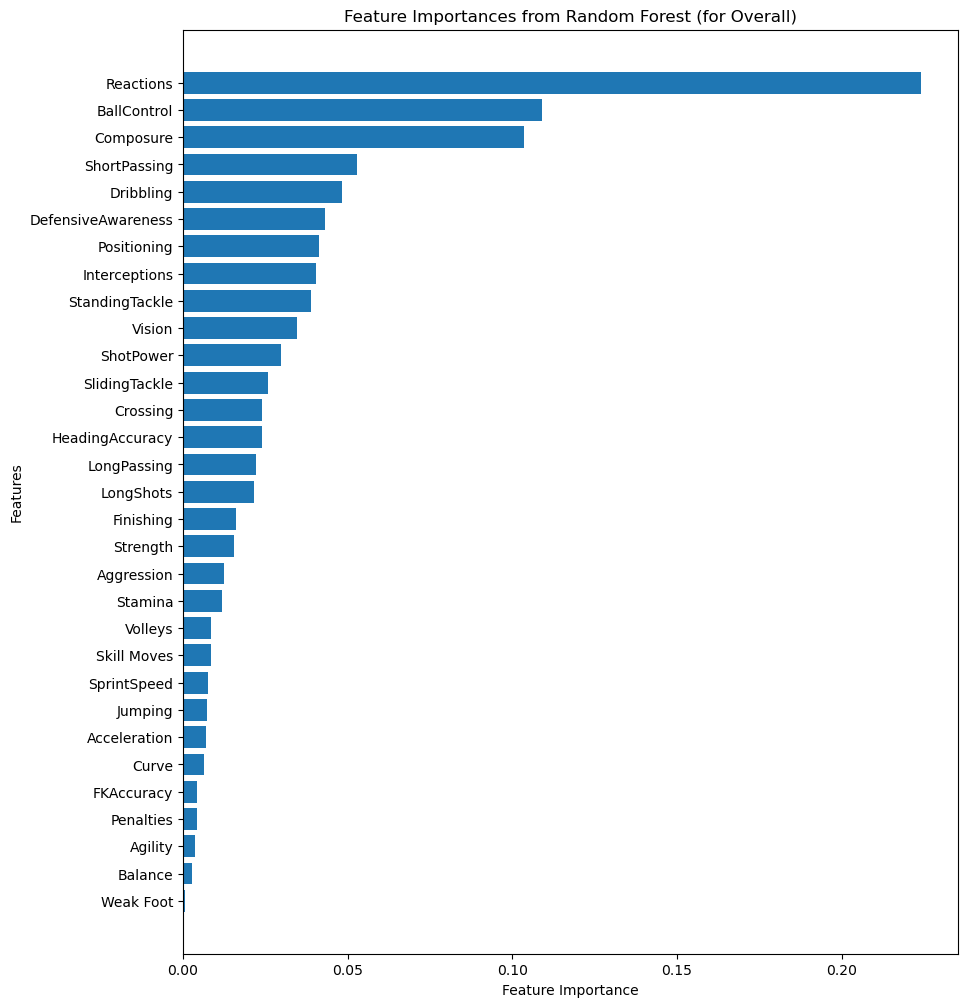

In [540]:
plt.figure(figsize=(10,12))
plt.barh(feat_imp["Feature"][::-1], feat_imp["Importance"][::-1])
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Feature Importances from Random Forest (for Overall)")
plt.show()

# Inference from above graph:-
- Reactions, Ball Control, and Composure are the top factors that determine a player’s Overall rating.
- Passing and dribbling attributes (Short Passing, Dribbling, Positioning) also play a strong role.
- Defensive skills (Defensive Awareness, Interceptions, Standing Tackle) matter too, but less than mental/technical consistency.
- Physical traits (Stamina, Strength, Sprint Speed, Jumping) are relatively less important for the Overall metric.
- Weak Foot and Skill Moves barely contribute to Overall.

## **Model Fitting (for Value):-**

In [541]:
df_temp.columns

Index(['ID', 'Name', 'Age', 'Nationality', 'Overall', 'Potential', 'Club',
       'Preferred Foot', 'Weak Foot', 'Skill Moves', 'Work Rate',
       'Jersey Number', 'Height', 'Weight', 'Crossing', 'Finishing',
       'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling', 'Curve',
       'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling',
       'GKKicking', 'GKPositioning', 'GKReflexes', 'Best Position',
       'DefensiveAwareness', 'Season', 'Joined_Year', 'Joined_Month',
       'Joined_Day', 'Value (€)', 'Wage (€)', 'Work Rate 1', 'Work Rate 2'],
      dtype='object')

In [542]:
value_df = df_temp.copy(deep=True)

In [543]:
columns_to_remove = ['Nationality','Potential','Preferred Foot','Work Rate','Jersey Number','Height', 'Weight',
                     'Season', 'Joined_Year', 'Joined_Month','Joined_Day','Wage (€)',
                      'ID', 'Name','Club','Overall']

In [544]:
value_df.drop(columns = columns_to_remove,axis=1,inplace=True)

In [545]:
value_df.shape

(90839, 41)

In [546]:
value_df.isna().sum().sum()

0

In [547]:
value_df

,Age,Weak Foot,Skill Moves,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,...,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Best Position,DefensiveAwareness,Value (€),Work Rate 1,Work Rate 2
0,29,4.0,4.0,77.0,94.0,77.0,83.0,88.0,86.0,86.0,...,27.0,25.0,31.0,33.0,37.0,ST,42.320234,83000000.0,High,Medium
1,28,3.0,3.0,73.0,76.0,59.0,84.0,75.0,80.0,73.0,...,11.0,11.0,14.0,8.0,11.0,CDM,81.126388,37500000.0,High,High
2,29,4.0,3.0,76.0,77.0,81.0,84.0,78.0,76.0,76.0,...,4.0,2.0,4.0,2.0,4.0,CDM,82.634765,41500000.0,High,High
3,24,4.0,3.0,82.0,63.0,75.0,83.0,68.0,79.0,78.0,...,5.0,7.0,14.0,15.0,9.0,LB,79.191519,41500000.0,High,Medium
4,23,4.0,5.0,78.0,71.0,73.0,85.0,84.0,89.0,84.0,...,5.0,6.0,2.0,4.0,3.0,CAM,68.487952,71500000.0,High,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90834,19,3.0,1.0,13.0,9.0,13.0,22.0,5.0,12.0,12.0,...,53.0,45.0,47.0,52.0,57.0,GK,6.000000,170000.0,Medium,Medium
90835,20,2.0,1.0,8.0,9.0,11.0,23.0,7.0,11.0,11.0,...,59.0,60.0,56.0,55.0,61.0,GK,5.000000,375000.0,Medium,Medium
90836,20,2.0,1.0,13.0,7.0,10.0,17.0,7.0,6.0,11.0,...,57.0,52.0,53.0,48.0,58.0,GK,5.000000,180000.0,Medium,Medium
90837,19,2.0,1.0,12.0,9.0,14.0,15.0,6.0,8.0,12.0,...,49.0,48.0,45.0,38.0,52.0,GK,21.000000,100000.0,Medium,Medium


In [548]:
value_df.drop(columns=['Work Rate 1','Work Rate 2'],axis=1,inplace=True)

In [549]:
value_df.drop(columns=['Best Position'],axis=1,inplace=True)

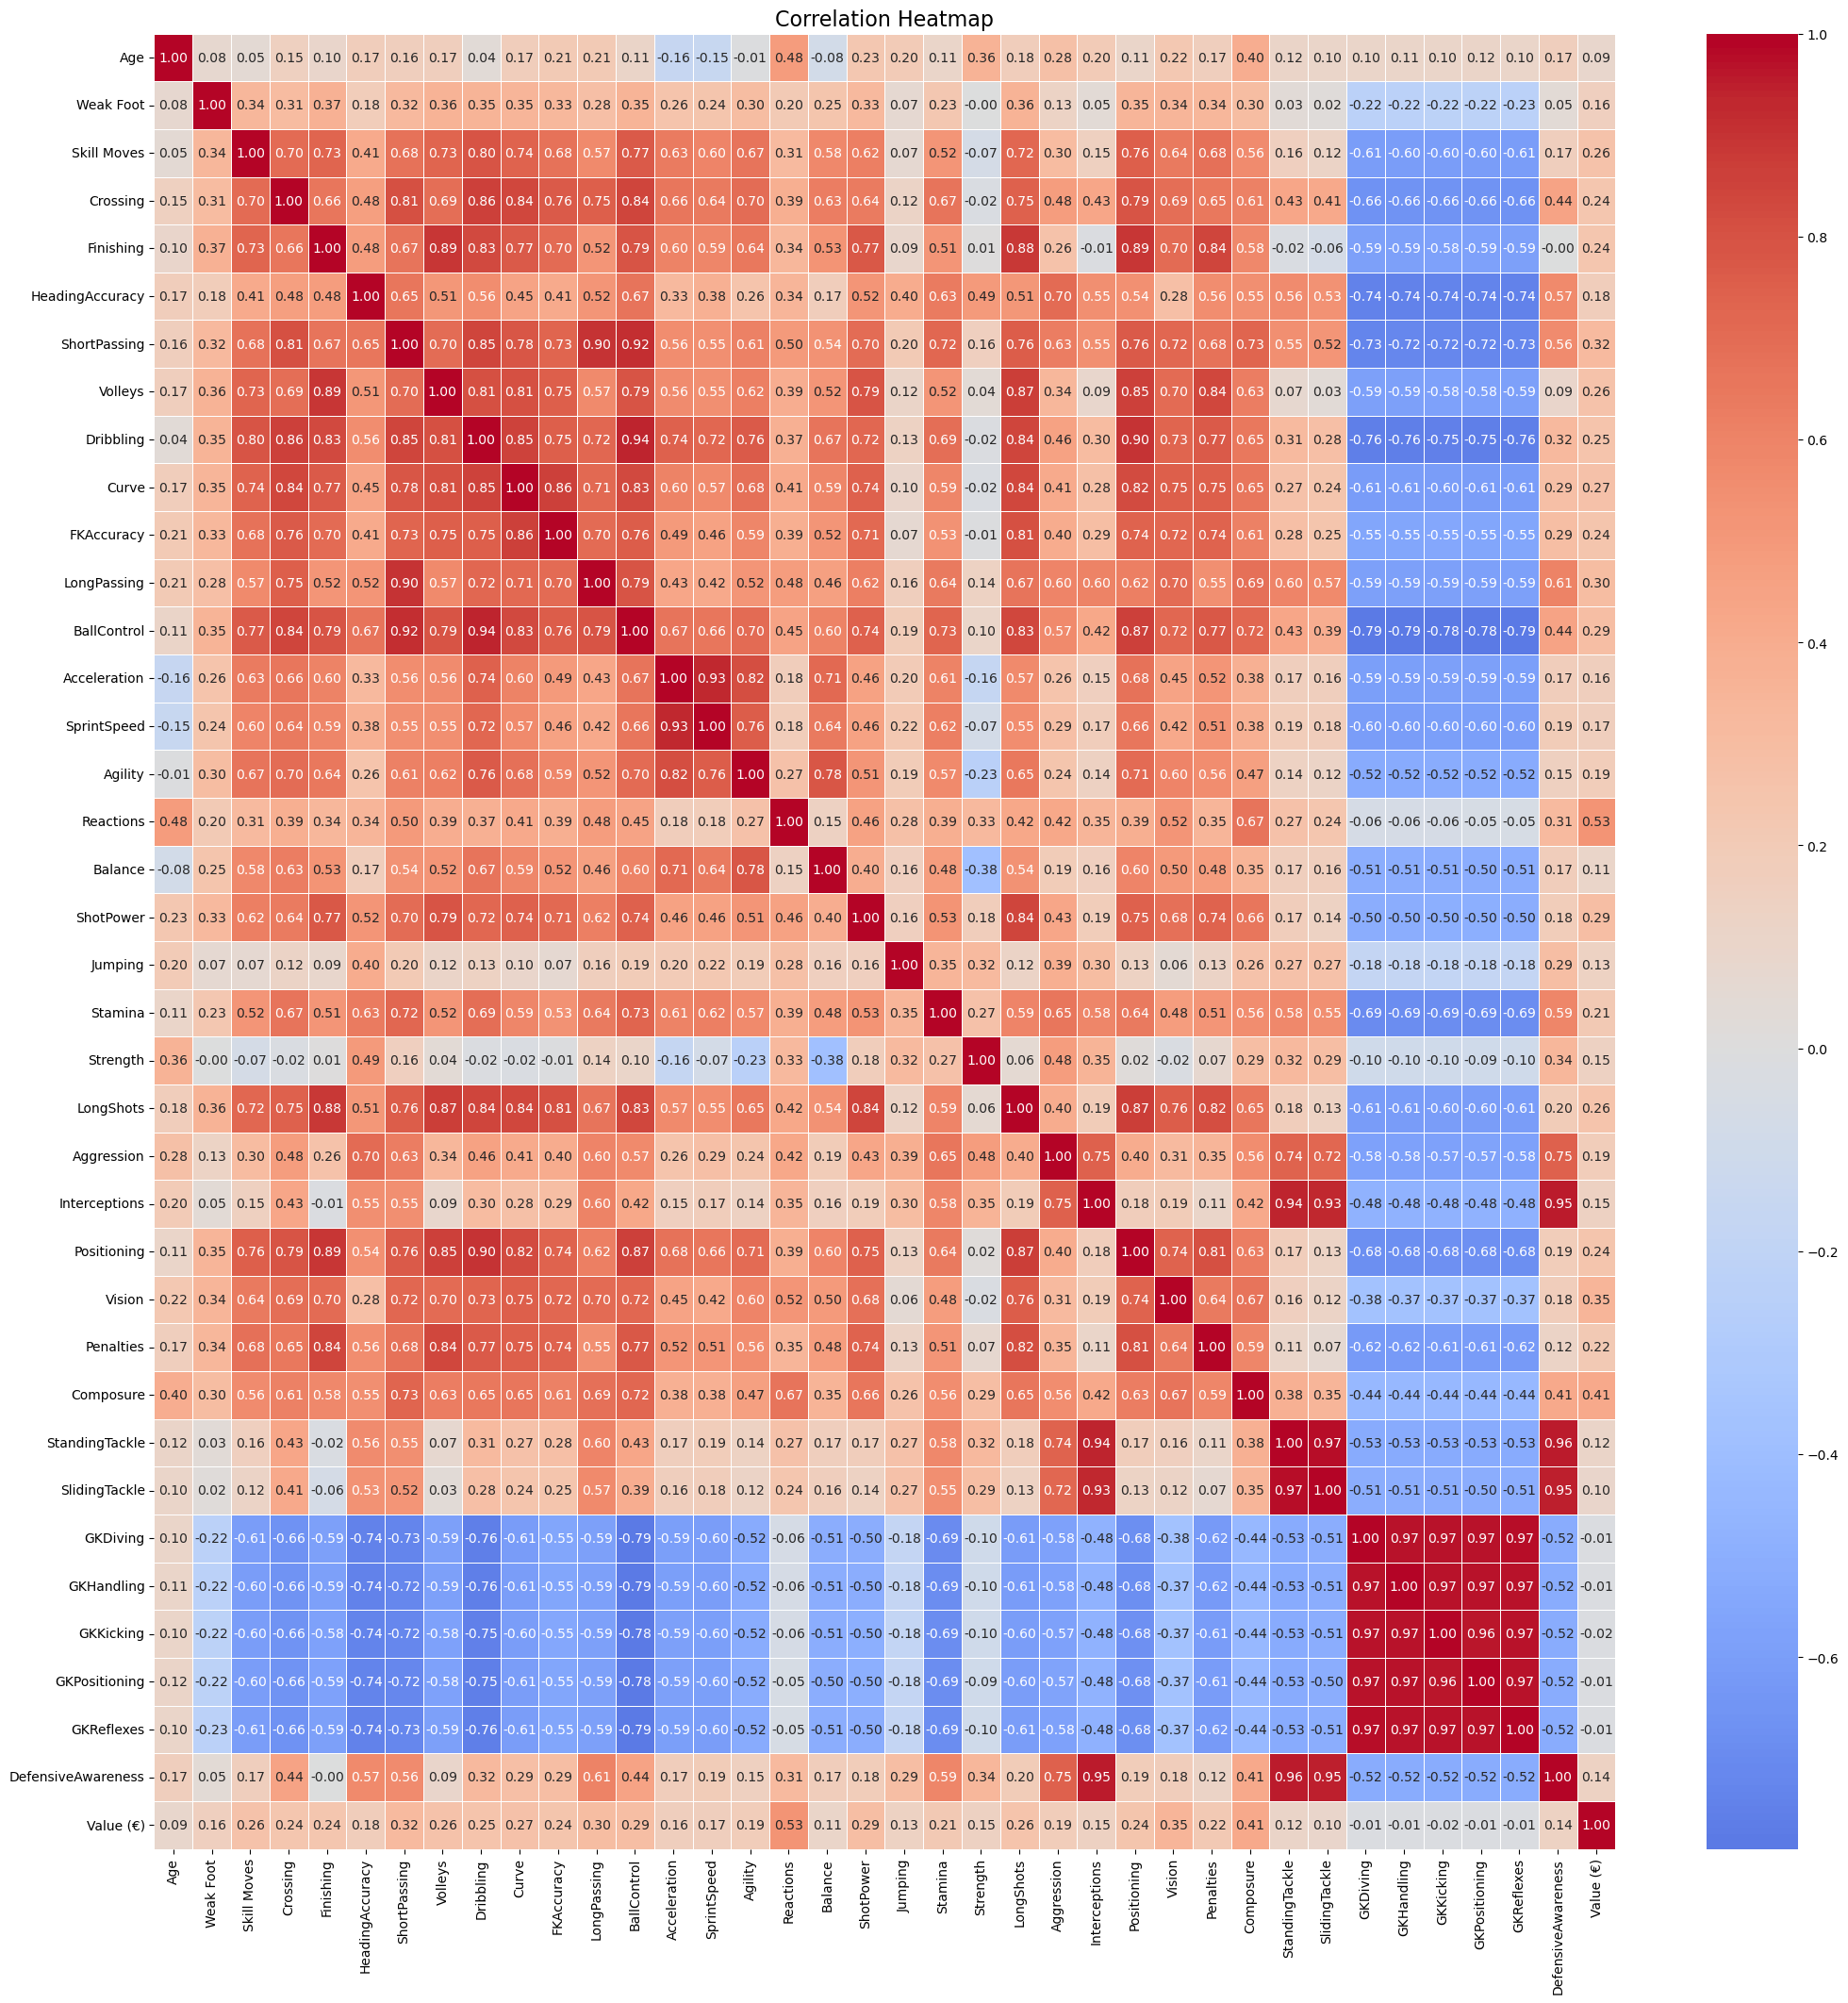

In [550]:
plt.figure(figsize=(25,25))
sns.heatmap(
    value_df.corr(), 
    annot=True,
    fmt=".2f",
    cmap="coolwarm", 
    center=0, 
    linewidths=0.5
)
plt.title("Correlation Heatmap", fontsize=16)
plt.show()

# Inference from above correlation matrix:-
- Reactions, Ball Control, Composure, Dribbling, Vision, Passing (short & long) have some of the strongest correlations (0.4–0.6)
- Age shows a negative correlation which makes sense in real-world football markets.
- GK attributes show very low (almost zero) corelation, meaning they don’t strongly influence market price compared to outfield skills.
- Some physical attributes like Sprint Speed, Stamina, Strength show mild correlation with Value, but less than technical/mental skills.

In [551]:
value_df['GK_score'] = (0.25*value_df['GKDiving'] + 0.15*value_df['GKHandling'] + 0.10*value_df['GKKicking'] + 0.20*value_df['GKPositioning']
                        + 0.35*value_df['GKReflexes'])
value_df.drop(columns=['GKDiving', 'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes'],axis=1,inplace=True)

In [552]:
value_df

,Age,Weak Foot,Skill Moves,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,...,Interceptions,Positioning,Vision,Penalties,Composure,StandingTackle,SlidingTackle,DefensiveAwareness,Value (€),GK_score
0,29,4.0,4.0,77.0,94.0,77.0,83.0,88.0,86.0,86.0,...,41.0,92.0,84.0,85.0,83.0,45.0,38.0,42.320234,83000000.0,33.15
1,28,3.0,3.0,73.0,76.0,59.0,84.0,75.0,80.0,73.0,...,86.0,88.0,76.0,63.0,85.0,85.0,88.0,81.126388,37500000.0,11.25
2,29,4.0,3.0,76.0,77.0,81.0,84.0,78.0,76.0,76.0,...,89.0,80.0,80.0,84.0,86.0,89.0,84.0,82.634765,41500000.0,3.50
3,24,4.0,3.0,82.0,63.0,75.0,83.0,68.0,79.0,78.0,...,85.0,77.0,78.0,80.0,79.0,83.0,83.0,79.191519,41500000.0,9.85
4,23,4.0,5.0,78.0,71.0,73.0,85.0,84.0,89.0,84.0,...,70.0,84.0,87.0,76.0,83.0,73.0,73.0,68.487952,71500000.0,4.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90834,19,3.0,1.0,13.0,9.0,13.0,22.0,5.0,12.0,12.0,...,14.0,8.0,23.0,10.0,33.0,12.0,10.0,6.000000,170000.0,55.05
90835,20,2.0,1.0,8.0,9.0,11.0,23.0,7.0,11.0,11.0,...,4.0,5.0,27.0,7.0,29.0,12.0,10.0,5.000000,375000.0,61.70
90836,20,2.0,1.0,13.0,7.0,10.0,17.0,7.0,6.0,11.0,...,13.0,8.0,33.0,12.0,29.0,13.0,12.0,5.000000,180000.0,57.25
90837,19,2.0,1.0,12.0,9.0,14.0,15.0,6.0,8.0,12.0,...,11.0,7.0,18.0,15.0,17.0,11.0,9.0,21.000000,100000.0,49.75


In [553]:
x = value_df.drop('Value (€)',axis=1)
y = value_df['Value (€)']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [554]:
rf_value = RandomForestRegressor(
    n_estimators=300,     
    max_depth=20,       
    min_samples_leaf=2,   
    max_features='sqrt',  
    n_jobs=-1,            
    random_state=42,
    bootstrap=True
)
rf_value.fit(x_train, y_train)

,n_estimators,300
,criterion,'squared_error'
,max_depth,20
,min_samples_split,2
,min_samples_leaf,2
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [555]:
pred = rf_value.predict(x_test)
print("RMSE:", np.sqrt(mean_squared_error(y_test, pred)))
print("R^2 :", r2_score(y_test, pred))

RMSE: 1650198.3669241294
R^2 : 0.9178427894604744


In [556]:
cv_scores = cross_val_score(rf_value, x_train, y_train, 
                            cv=5, scoring="r2", n_jobs=-1)
print("Cross-val R²:", cv_scores)
print("Mean R²:", cv_scores.mean())

Cross-val R²: [0.91668249 0.91254754 0.88179513 0.91870477 0.88716286]
Mean R²: 0.9033785595449976


In [557]:
importances = rf_value.feature_importances_

feat_imp = pd.DataFrame({
    "Feature": x_train.columns,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)

feat_imp.head(10)

,Feature,Importance
16,Reactions,0.186900
12,BallControl,0.117221
6,ShortPassing,0.077752
8,Dribbling,0.068599
28,Composure,0.058645
25,Positioning,0.055068
26,Vision,0.045919
32,GK_score,0.038397
4,Finishing,0.036015
29,StandingTackle,0.032428


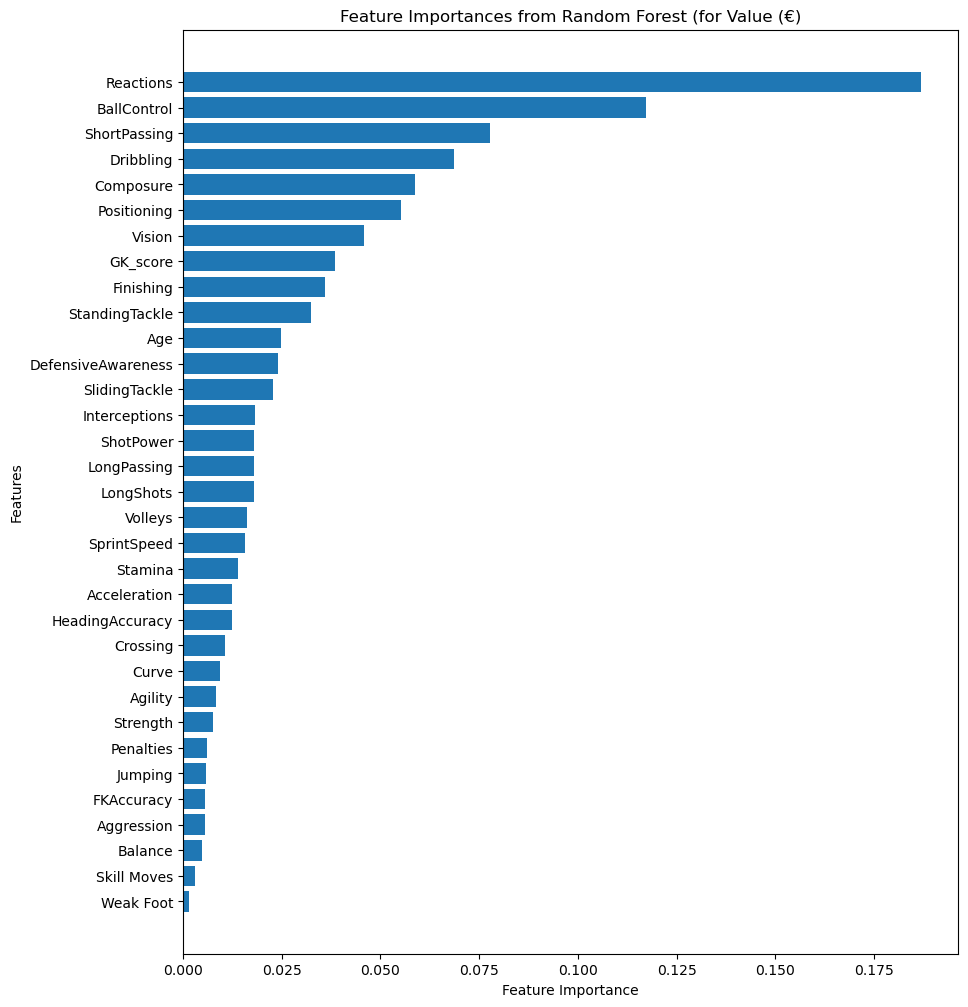

In [558]:
plt.figure(figsize=(10,12))
plt.barh(feat_imp["Feature"][::-1], feat_imp["Importance"][::-1])
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Feature Importances from Random Forest (for Value (€)")
plt.show()

# Inference from above graph:-
- Reactions and Ball Control dominate.
- Passing/vision (Short Passing, Dribbling, Vision, Positioning) are strong indicators of market value.
- Age and GK_score show up as more important here, because age affects transfer value, and GKs are valued differently.
- Physicals (Stamina, Sprint Speed) matter more for value than for Overall.
- Skill Moves, Weak Foot, Penalties have little impact on market value.